#Phân tích dữ liệu về số ca mắc và tử vong của Covid-19

## Làm sạch dữ liệu

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/4/PTDL/WHO-COVID-19-global-data.csv')
data.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,EMRO,NaN,0,NaN,0
1,2020-01-12,AF,Afghanistan,EMRO,NaN,0,NaN,0
2,2020-01-19,AF,Afghanistan,EMRO,NaN,0,NaN,0
3,2020-01-26,AF,Afghanistan,EMRO,NaN,0,NaN,0
4,2020-02-02,AF,Afghanistan,EMRO,NaN,0,NaN,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51840 entries, 0 to 51839
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      51840 non-null  object 
 1   Country_code       51624 non-null  object 
 2   Country            51840 non-null  object 
 3   WHO_region         47952 non-null  object 
 4   New_cases          36501 non-null  float64
 5   Cumulative_cases   51840 non-null  int64  
 6   New_deaths         24230 non-null  float64
 7   Cumulative_deaths  51840 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 3.2+ MB


In [5]:
data.isnull().sum()

Date_reported            0
Country_code           216
Country                  0
WHO_region            3888
New_cases            15339
Cumulative_cases         0
New_deaths           27610
Cumulative_deaths        0
dtype: int64

* Dữ liệu có 51840 cột trong đó 8 đặc trưng.
* Đặc trưng dạng numerical có 4 : New_cases, Cumulative_case, New_deaths,Cumulative_deaths.
* Đặc trưng dạng categorical có 4: Date_reported, Country_code, Country,        WHO_region   
* Các đặc trưng bị thiếu dữ liệu: Country_code, WHO_region, New_cases, New_deaths.

In [6]:
data.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,3.650100e+04,5.184000e+04,24230.000000,5.184000e+04
mean,2.122382e+04,1.626165e+06,290.193768,1.892682e+04
std,2.799486e+05,7.272576e+06,1232.385412,7.859959e+04
min,-6.507900e+04,0.000000e+00,-3432.000000,0.000000e+00
25%,5.300000e+01,2.943000e+03,4.000000,2.100000e+01
50%,4.790000e+02,3.904600e+04,21.000000,4.150000e+02
75%,4.550000e+03,4.769692e+05,110.000000,6.249000e+03
max,4.047548e+07,1.034368e+08,47687.000000,1.174676e+06


In [7]:
data.loc[data['New_deaths'] == -3432.000000]

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
9457,2023-04-02,CL,Chile,AMRO,14253.0,5264330,-3432.0,61050


In [8]:
data.loc[data['New_cases'] == -6.507900e+04]

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
36909,2023-08-20,PH,Philippines,WPRO,-65079.0,4108552,NaN,66646


In [9]:
check_new_cases =(data['New_cases'] < 0).sum()
percent = check_new_cases  / (data['New_cases'] ).count()
print("Tổng số lượng và phần trăm giá trị âm trong cột New_cases : %d -> %f%%" % (check_new_cases , percent *100) )

Tổng số lượng và phần trăm giá trị âm trong cột New_cases : 18 -> 0.049314%


In [10]:
check_new_deaths =(data['New_deaths'] < 0).sum()
percent = check_new_deaths  / (data['New_deaths'] ).count()
print("Tổng số lượng và phần trăm giá trị âm trong cột New_deaths : %d -> %f%%" % (check_new_deaths , percent *100) )

Tổng số lượng và phần trăm giá trị âm trong cột New_deaths : 11 -> 0.045398%


In [11]:
data.dropna(subset=['Country_code', 'WHO_region'], inplace=True)
data['New_cases'].fillna(0, inplace=True)
data['New_deaths'].fillna(0, inplace=True)

Xóa dữ liệu thiếu ở Country_code và WHO_region, lắp đầy dữ liệu ở cột New_cases và New_deaths bằng 0

In [12]:
import pandas as pd
import numpy as np

data = data[(data['New_cases'] >= 0) & (data['New_deaths'] >= 0)]

#Cập nhật Cumulative_cases và Cumulative_deaths
data = data.copy()
data['Cumulative_cases'] = data.groupby('Country_code')['New_cases'].cumsum()
data['Cumulative_deaths'] = data.groupby('Country_code')['New_deaths'].cumsum()


Xóa dữ liệu âm và tính lại cột Cumulative_cases và Cumulative_deaths

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47710 entries, 0 to 51839
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      47710 non-null  object 
 1   Country_code       47710 non-null  object 
 2   Country            47710 non-null  object 
 3   WHO_region         47710 non-null  object 
 4   New_cases          47710 non-null  float64
 5   Cumulative_cases   47710 non-null  float64
 6   New_deaths         47710 non-null  float64
 7   Cumulative_deaths  47710 non-null  float64
dtypes: float64(4), object(4)
memory usage: 3.3+ MB


In [14]:
data.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,4.771000e+04,4.771000e+04,47710.000000,4.771000e+04
mean,1.620687e+04,1.762749e+06,147.197736,2.052266e+04
std,2.450303e+05,7.564968e+06,889.821630,8.172839e+04
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,0.000000e+00,4.150250e+03,0.000000,3.100000e+01
50%,9.900000e+01,4.939000e+04,0.000000,6.710000e+02
75%,2.181750e+03,5.732515e+05,22.000000,7.574000e+03
max,4.047548e+07,1.034368e+08,47687.000000,1.174676e+06


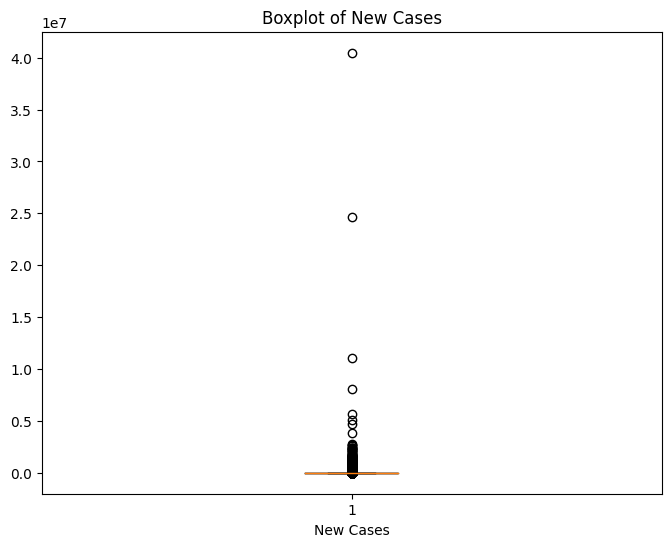

In [15]:
# Vẽ boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(data['New_cases'])
plt.title('Boxplot of New Cases')
plt.xlabel('New Cases')
plt.show()

In [16]:
data = data[data.New_cases <2.0e+07]
data.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,4.770800e+04,4.770800e+04,47708.000000,4.770800e+04
mean,1.484257e+04,1.759688e+06,146.706255,2.052151e+04
std,1.140761e+05,7.549922e+06,885.738692,8.172989e+04
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,0.000000e+00,4.149250e+03,0.000000,3.100000e+01
50%,9.900000e+01,4.937500e+04,0.000000,6.710000e+02
75%,2.179500e+03,5.726365e+05,22.000000,7.574000e+03
max,1.109855e+07,1.034368e+08,47687.000000,1.174676e+06


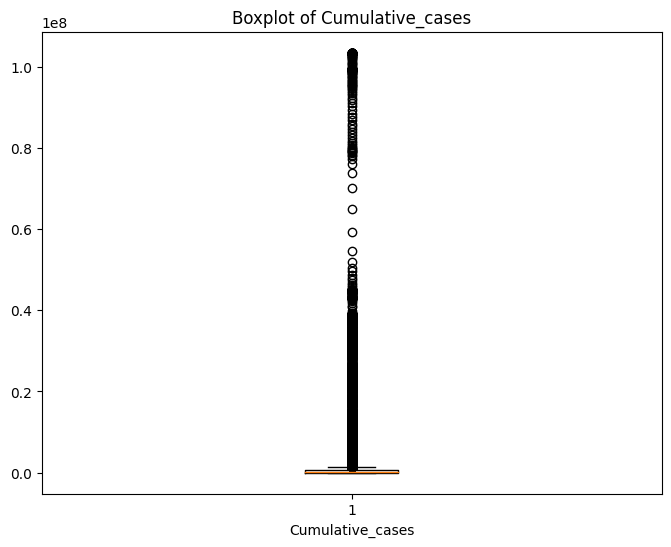

In [17]:
# Vẽ boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(data['Cumulative_cases'])
plt.title('Boxplot of Cumulative_cases')
plt.xlabel('Cumulative_cases')
plt.show()

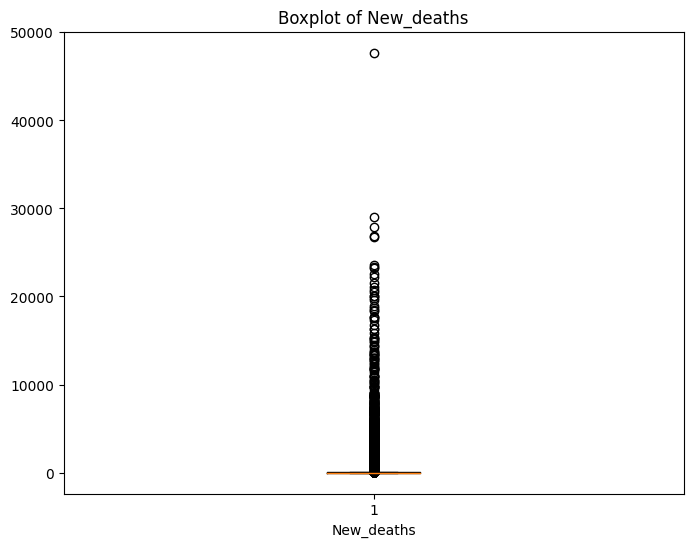

In [18]:
# Vẽ boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(data['New_deaths'])
plt.title('Boxplot of New_deaths')
plt.xlabel('New_deaths')
plt.show()

In [19]:
data = data[data.New_deaths <40000]
data.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,4.770700e+04,4.770700e+04,47707.000000,4.770700e+04
mean,1.483883e+04,1.757658e+06,145.709749,2.051948e+04
std,1.140744e+05,7.536961e+06,858.587980,8.172953e+04
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,0.000000e+00,4.148500e+03,0.000000,3.100000e+01
50%,9.900000e+01,4.937000e+04,0.000000,6.710000e+02
75%,2.178500e+03,5.723165e+05,22.000000,7.574000e+03
max,1.109855e+07,1.034368e+08,28982.000000,1.174676e+06


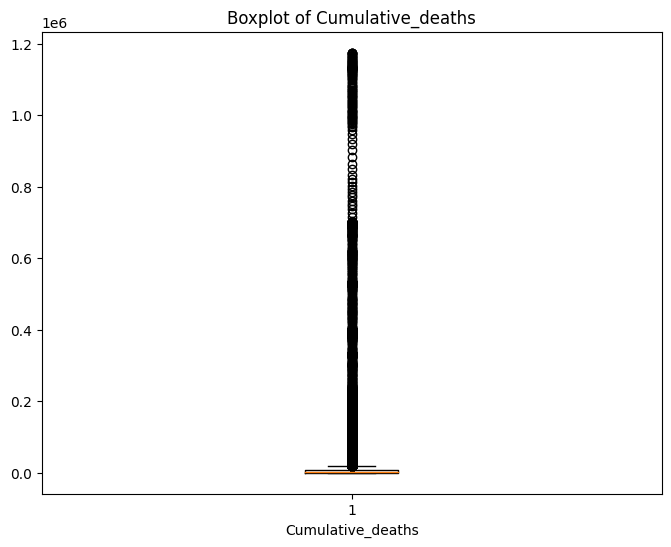

In [20]:
# Vẽ boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(data['Cumulative_deaths'])
plt.title('Boxplot of Cumulative_deaths')
plt.xlabel('Cumulative_deaths')
plt.show()

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47707 entries, 0 to 51839
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      47707 non-null  object 
 1   Country_code       47707 non-null  object 
 2   Country            47707 non-null  object 
 3   WHO_region         47707 non-null  object 
 4   New_cases          47707 non-null  float64
 5   Cumulative_cases   47707 non-null  float64
 6   New_deaths         47707 non-null  float64
 7   Cumulative_deaths  47707 non-null  float64
dtypes: float64(4), object(4)
memory usage: 3.3+ MB


In [22]:
data.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,4.770700e+04,4.770700e+04,47707.000000,4.770700e+04
mean,1.483883e+04,1.757658e+06,145.709749,2.051948e+04
std,1.140744e+05,7.536961e+06,858.587980,8.172953e+04
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,0.000000e+00,4.148500e+03,0.000000,3.100000e+01
50%,9.900000e+01,4.937000e+04,0.000000,6.710000e+02
75%,2.178500e+03,5.723165e+05,22.000000,7.574000e+03
max,1.109855e+07,1.034368e+08,28982.000000,1.174676e+06


Dựa vào bảng mô tả:
* New_cases (Số ca mắc mới):
Trung bình có khoảng 14,838 ca mắc mới được ghi nhận mỗi ngày.
Số lượng ca mắc mới dao động từ 0 đến 11,098,550 với đa số nằm trong khoảng từ 0 đến 2,178
Giá trị trung vị (median) là 99, tức là có khoảng 50% số lượng dòng có số ca mắc mới dưới 99 và 50% còn lại có số ca mắc mới cao hơn 99.

* Cumulative_cases (Tổng số ca mắc tích lũy):
Trung bình có khoảng 1,757,658 ca mắc tích lũy.
Tổng số ca mắc tích lũy dao động từ 0 đến 103,436,800.
Giá trị trung vị là 49,370, tức là có khoảng 50% số lượng dòng có tổng số ca mắc tích lũy dưới 49,370 và 50% còn lại có tổng số ca mắc tích lũy cao hơn 49,370.

* New_deaths (Số ca tử vong mới):
Trung bình có khoảng 145.71 ca tử vong mới được ghi nhận mỗi ngày.
Số lượng ca tử vong mới dao động từ 0 đến 28,982 với đa số nằm trong khoảng từ 0 đến 22.
Giá trị trung vị là 0, tức là có khoảng 50% số lượng dòng có số ca tử vong mới là 0 và 50% còn lại có số ca tử vong mới cao hơn 0

* Cumulative_deaths (Tổng số ca tử vong tích lũy):
Trung bình có khoảng 20,519 ca tử vong tích lũy.
Tổng số ca tử vong tích lũy dao động từ 0 đến 1,174,676.
Giá trị trung vị là 671, tức là có khoảng 50% số lượng dòng có tổng số ca tử vong tích lũy dưới 671 và 50% còn lại có tổng số ca tử vong tích lũy cao hơn 671.

Nhìn chung, biểu đồ phân phối có xu hướng lệch phải với một số dữ liệu nổi bật có giá trị cao. Điều này có thể đại diện cho việc số lượng ca mắc và tử vong trong dữ liệu không phân phối đồng đều và có thể tập trung ở một số khu vực cụ thể.

## Chuẩn bị dữ liệu

In [23]:
data.head(10)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,EMRO,0.0,0.0,0.0,0.0
1,2020-01-12,AF,Afghanistan,EMRO,0.0,0.0,0.0,0.0
2,2020-01-19,AF,Afghanistan,EMRO,0.0,0.0,0.0,0.0
3,2020-01-26,AF,Afghanistan,EMRO,0.0,0.0,0.0,0.0
4,2020-02-02,AF,Afghanistan,EMRO,0.0,0.0,0.0,0.0
5,2020-02-09,AF,Afghanistan,EMRO,0.0,0.0,0.0,0.0
6,2020-02-16,AF,Afghanistan,EMRO,0.0,0.0,0.0,0.0
7,2020-02-23,AF,Afghanistan,EMRO,0.0,0.0,0.0,0.0
8,2020-03-01,AF,Afghanistan,EMRO,1.0,1.0,0.0,0.0
9,2020-03-08,AF,Afghanistan,EMRO,0.0,1.0,0.0,0.0


In [24]:
data['Date_reported'] = pd.to_datetime(data['Date_reported'], format='%Y-%m-%d')

In [25]:
data.insert(loc = 1, column = 'year_month', value = data.Date_reported.map (lambda x: 100 * x.year + x.month))

In [26]:
data.insert(loc = 2, column = 'year', value = data.Date_reported.dt.year)

In [27]:
data.insert(loc =3, column = 'month', value = data.Date_reported.dt.month)

In [28]:
data.insert(loc =4, column = 'day', value = data.Date_reported.dt.day)

In [29]:
data.head(10)

,Date_reported,year_month,year,month,day,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,202001,2020,1,5,AF,Afghanistan,EMRO,0.0,0.0,0.0,0.0
1,2020-01-12,202001,2020,1,12,AF,Afghanistan,EMRO,0.0,0.0,0.0,0.0
2,2020-01-19,202001,2020,1,19,AF,Afghanistan,EMRO,0.0,0.0,0.0,0.0
3,2020-01-26,202001,2020,1,26,AF,Afghanistan,EMRO,0.0,0.0,0.0,0.0
4,2020-02-02,202002,2020,2,2,AF,Afghanistan,EMRO,0.0,0.0,0.0,0.0
5,2020-02-09,202002,2020,2,9,AF,Afghanistan,EMRO,0.0,0.0,0.0,0.0
6,2020-02-16,202002,2020,2,16,AF,Afghanistan,EMRO,0.0,0.0,0.0,0.0
7,2020-02-23,202002,2020,2,23,AF,Afghanistan,EMRO,0.0,0.0,0.0,0.0
8,2020-03-01,202003,2020,3,1,AF,Afghanistan,EMRO,1.0,1.0,0.0,0.0
9,2020-03-08,202003,2020,3,8,AF,Afghanistan,EMRO,0.0,1.0,0.0,0.0


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47707 entries, 0 to 51839
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date_reported      47707 non-null  datetime64[ns]
 1   year_month         47707 non-null  int64         
 2   year               47707 non-null  int64         
 3   month              47707 non-null  int64         
 4   day                47707 non-null  int64         
 5   Country_code       47707 non-null  object        
 6   Country            47707 non-null  object        
 7   WHO_region         47707 non-null  object        
 8   New_cases          47707 non-null  float64       
 9   Cumulative_cases   47707 non-null  float64       
 10  New_deaths         47707 non-null  float64       
 11  Cumulative_deaths  47707 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(4), object(3)
memory usage: 5.7+ MB


## Phân tích đơn biến - song biến - đa biến

 Tách các đặc trưng numerical và categorical

In [31]:
categories=data.select_dtypes(include=['object']).columns
numerics = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(categories)
print("Numerical Variables:")
print(numerics)

Categorical Variables:
Index(['Country_code', 'Country', 'WHO_region'], dtype='object')
Numerical Variables:
['year_month', 'year', 'month', 'day', 'New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths']


# Phân tích dữ liệu

## Đơn biến

year_month


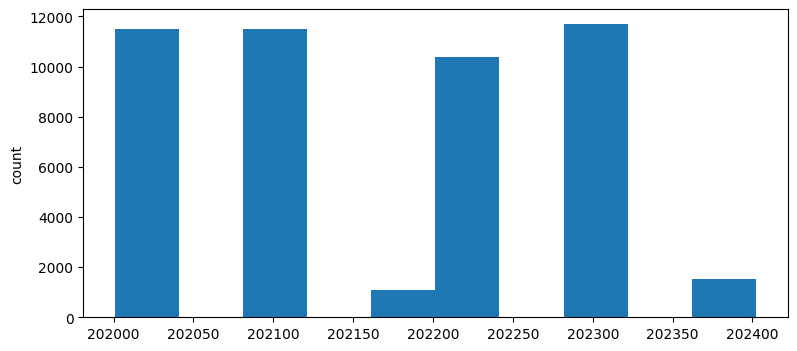

year


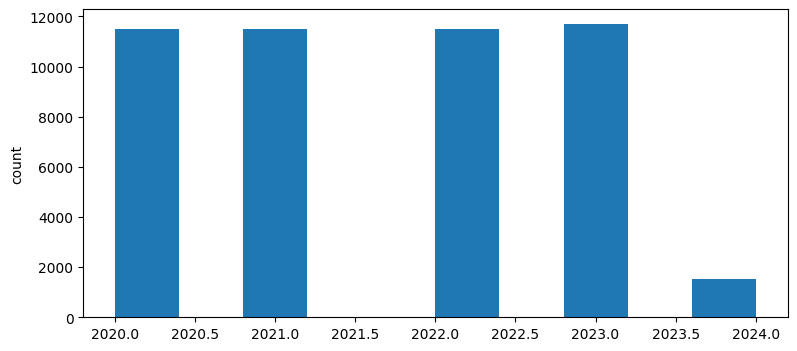

month


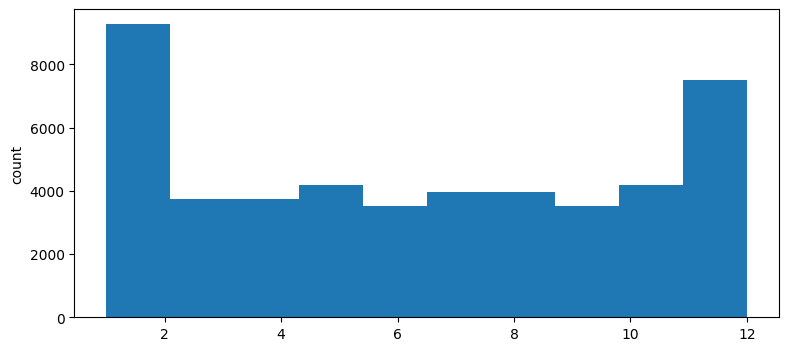

day


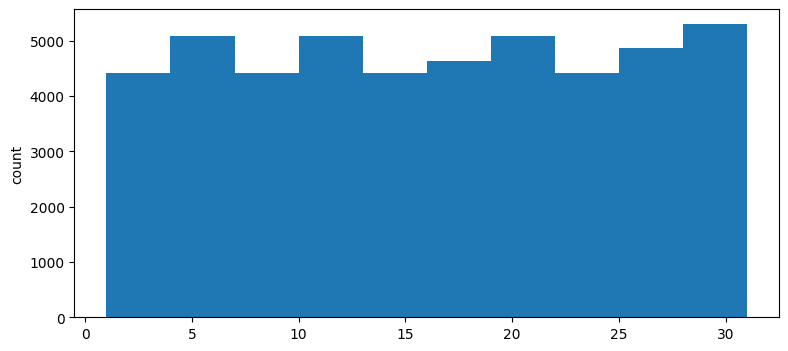

New_cases


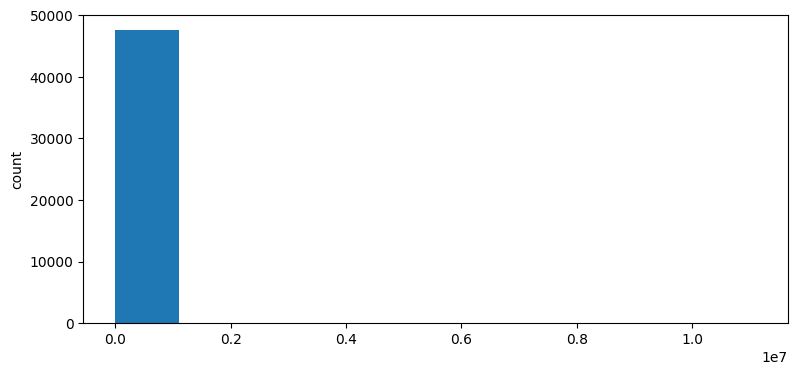

Cumulative_cases


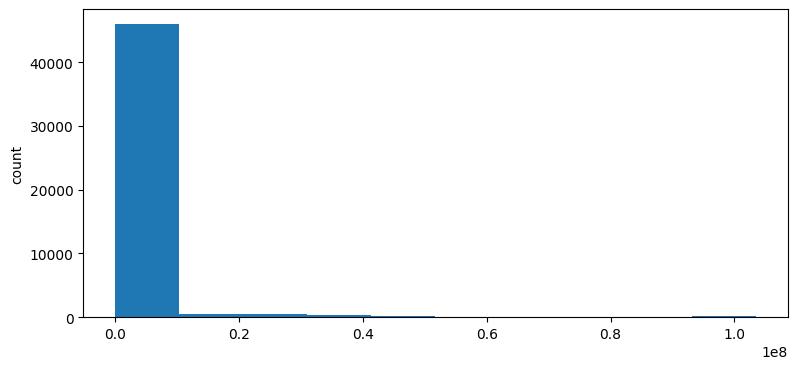

New_deaths


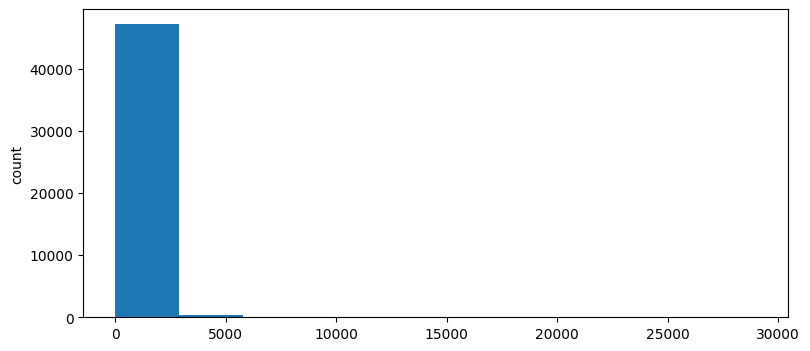

Cumulative_deaths


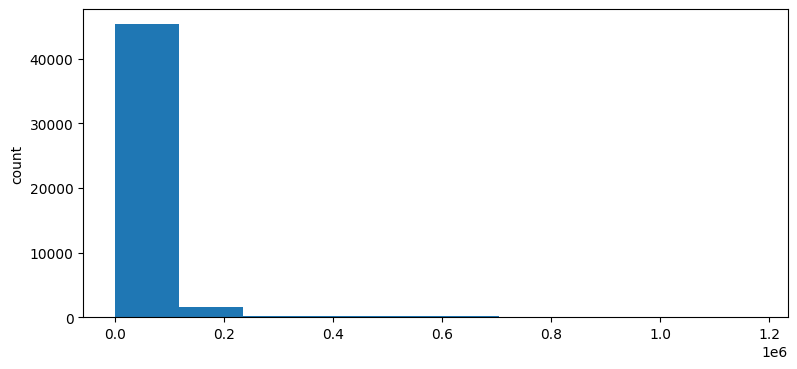

In [32]:
for col in numerics:
    print(col)
    plt.figure(figsize = (20, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.show()

### Theo quan sát từ biểu đồ histogram ta thấy được:

* Từ năm 2020 đến 2023 số bản ghi về ca mắc của các nước được cập nhập liên tục và cao đều khoảng 11000 dòng thông tin được cập nhật mỗi năm (chủ yếu đầu năm và cuối năm), tuy nhiên cuối năm 2023 đầu năm 2024 thì số ca giảm mạnh còn gần 2000 dòng thông tin được cập nhật. Điều này có thể cho ta biết được số ca mắc và tử vong tăng cao trong khoảng thời gian từ 2020 đến đầu 2023 và giảm dần từ cuối năm 2023 đến 2024.
*  Trung bình đầu và cuối năm (chủ yếu tháng 2 và tháng 12) của mỗi năm thì số lượng thông tin về ca mắc của các nước cập nhật cao từ 7000 thông tin trở lên, các tháng còn lại dao động đồng đều dưới 4200 thông tin được ghi nhận.

* Số ca mắc mới được ghi nhận của các nước trên thế giới (New_case) tập trung chủ yếu ở 0 đến 1.000.000 ca và tổng số ca mắc (Cumulative_cases) tập trung chủ yếu từ 0 đến 10.000.000 ca,  cũng có 1 vài trường hợp trên 10.000.000 ca nhưng rất ít.
* Số ca tử vong do covid-19 (New_deaths) của các nước tập trung từ 0 đến 25000 ca và tổng số ca tử vong dao động chủ yếu từ 0 đến 1.000.000 ca.

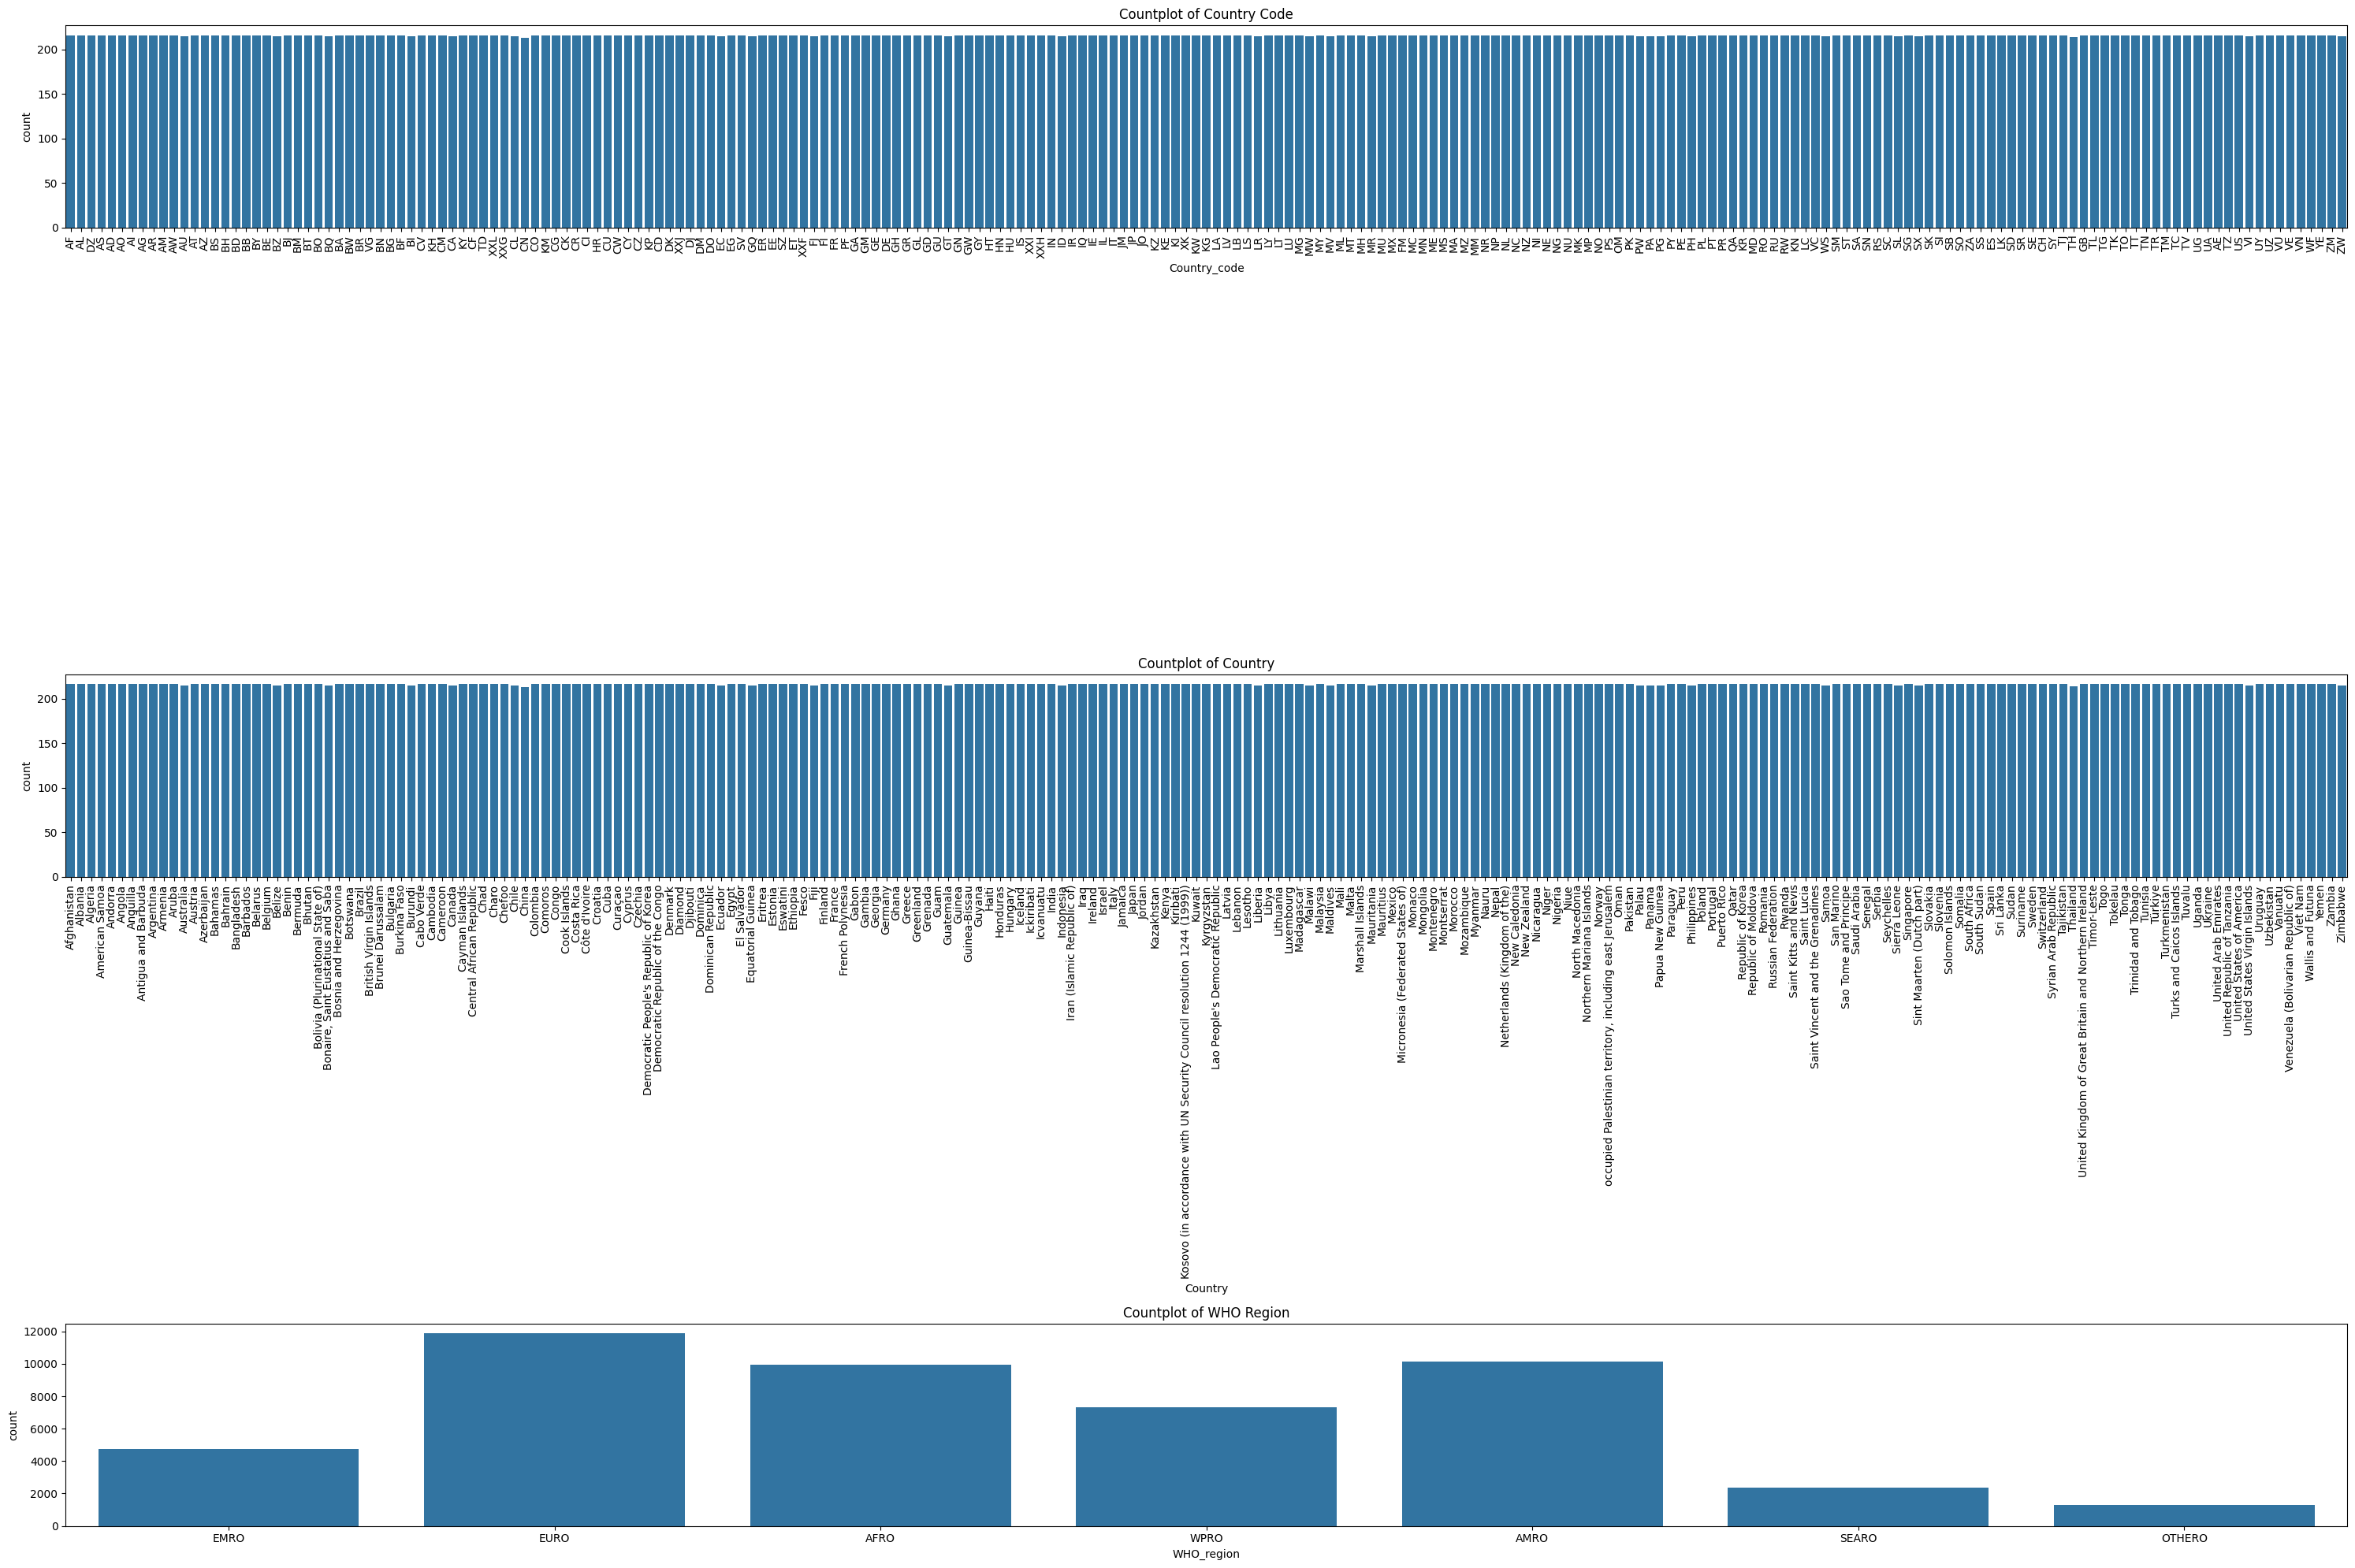

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Đặt kích thước biểu đồ
plt.figure(figsize=(30, 20))

# Vẽ countplot cho 'Country_code'
plt.subplot(3, 1, 1)
sns.countplot(x='Country_code', data=data)
plt.title('Countplot of Country Code')
plt.xticks(rotation=90)

# Vẽ countplot cho 'Country'
plt.subplot(3, 1, 2)
sns.countplot(x='Country', data=data)
plt.title('Countplot of Country')
plt.xticks(rotation=90)

# Vẽ countplot cho 'WHO_region'
plt.subplot(3, 1, 3)
sns.countplot(x='WHO_region', data=data)
plt.title('Countplot of WHO Region')

# Tinh chỉnh và hiển thị biểu đồ
plt.tight_layout()
plt.show()


In [34]:
num_countries = data['Country'].nunique()
print("Số lượng quốc gia:", num_countries)

Số lượng quốc gia: 221


### Theo quan sát ta thấy được có 221 quốc gia với mỗi quốc gia có hơn 200 dòng dữ liệu, và 6 khu vực của WHO (tổ chức y tế thế giới)
* EMRO: Eastern Mediterranean Region (Khu vực Đông Địa Trung Hải): Bao gồm các quốc gia ở khu vực Trung Đông.
* EURO: European Region (Khu vực Châu Âu): Bao gồm các quốc gia châu Âu.
* AFRO: African Region (Khu vực Châu Phi): Bao gồm các quốc gia ở châu Phi.
* WPRO: Western Pacific Region (Khu vực Tây Thái Bình Dương): Bao gồm các quốc gia ở Thái Bình Dương.
* AMRO: Region of the Americas (Khu vực châu Mỹ): Bao gồm các quốc gia ở châu Mỹ, kể cả Bắc, Trung và Nam Mỹ.
* SEARO: South-East Asia Region (Khu vực Đông và Nam Á): Bao gồm các quốc gia ở Đông Nam Á, bao gồm cả Ấn Độ.
* OTHERO: Đây có thể là một nhóm các quốc gia không thuộc bất kỳ khu vực WHO nào trong các khu vực trên.

Dựa vào biểu đồ ta thấy được dữ liệu tập trung chủ yếu ở các khu vực Châu Âu (EURO) gần 12.000 dữ liệu, Châu Phi(AFRO) gần 10.000,Châu Mỹ (AMRO) hơn 10.000 và Thái Bình Dương (WPRO) gần 8.000, các khu vực còn lại thấp.

## Song biến

<Figure size 1300x1700 with 0 Axes>

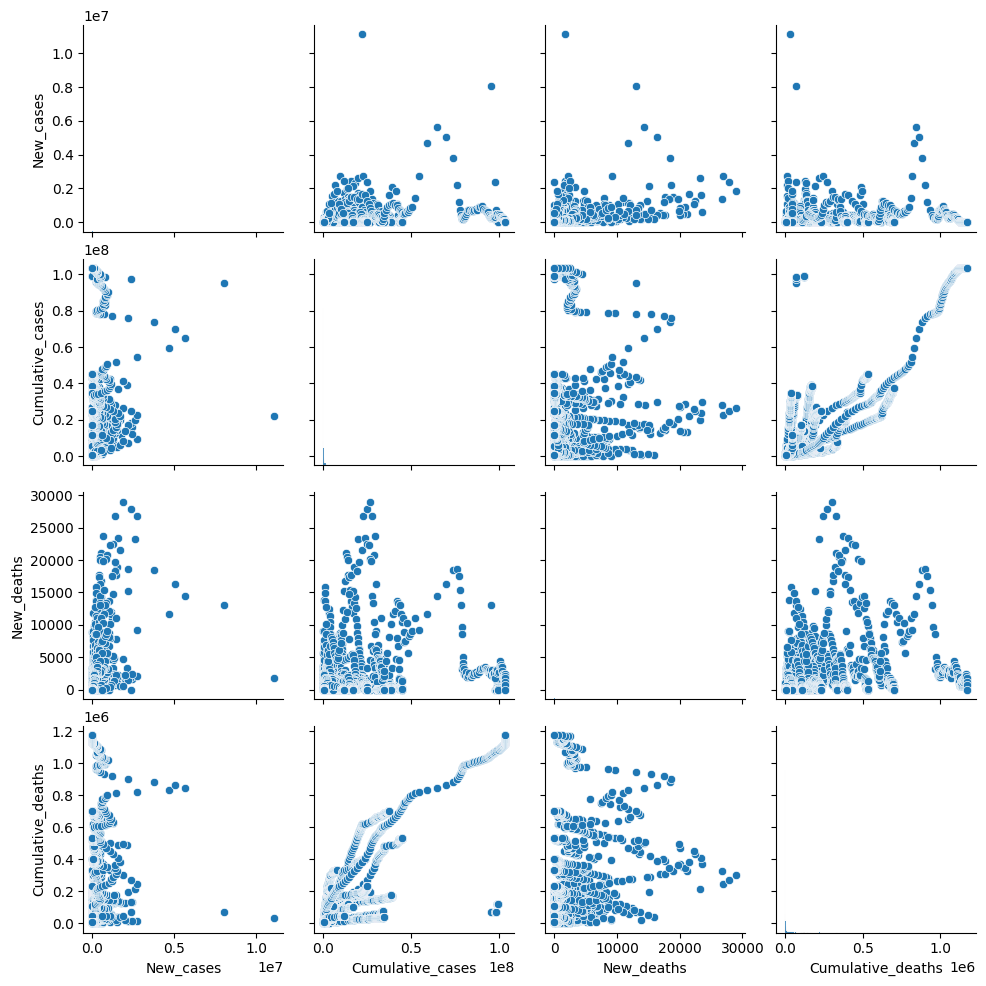

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 17))
sns.pairplot(data=data.drop(['year_month','year','month','day'],axis=1))
plt.show()


Nhìn vào biểu đồ ta thấy:

* Ca nhiễm mới và ca nhiễm tích lũy: Đồ thị phân tán này cho thấy mối tương quan dương mạnh giữa ca nhiễm mới và ca nhiễm tích lũy. Điều này có nghĩa là khi số ca nhiễm mới tăng lên, số ca nhiễm tích lũy cũng tăng lên.
* Ca tử vong mới và ca tử vong tích lũy cũng tương tự khi số ca tử vong mới tăng lên, số ca tử vong tích lũy cũng tăng lên.
* Ca nhiễm mới và Ca tử vong mới : Đồ thị phân tán này cho thấy mối tương quan dương vừa phải giữa ca nhiễm mới và Ca tử vong mới. Điều này có nghĩa là khi số ca nhiễm mới tăng lên, số ca tử vong mới cũng có xu hướng tăng lên.
* Ca tử vong tích lũy và ca nhiễm tích lũy tương tự khi số ca nhiễm tích lũy tăng lên, số ca tử vong tích lũy cũng có xu hướng tăng lên.

Qua biểu đồ trên ta thấy được các biến có mối quan hệ tương quan với nhau.

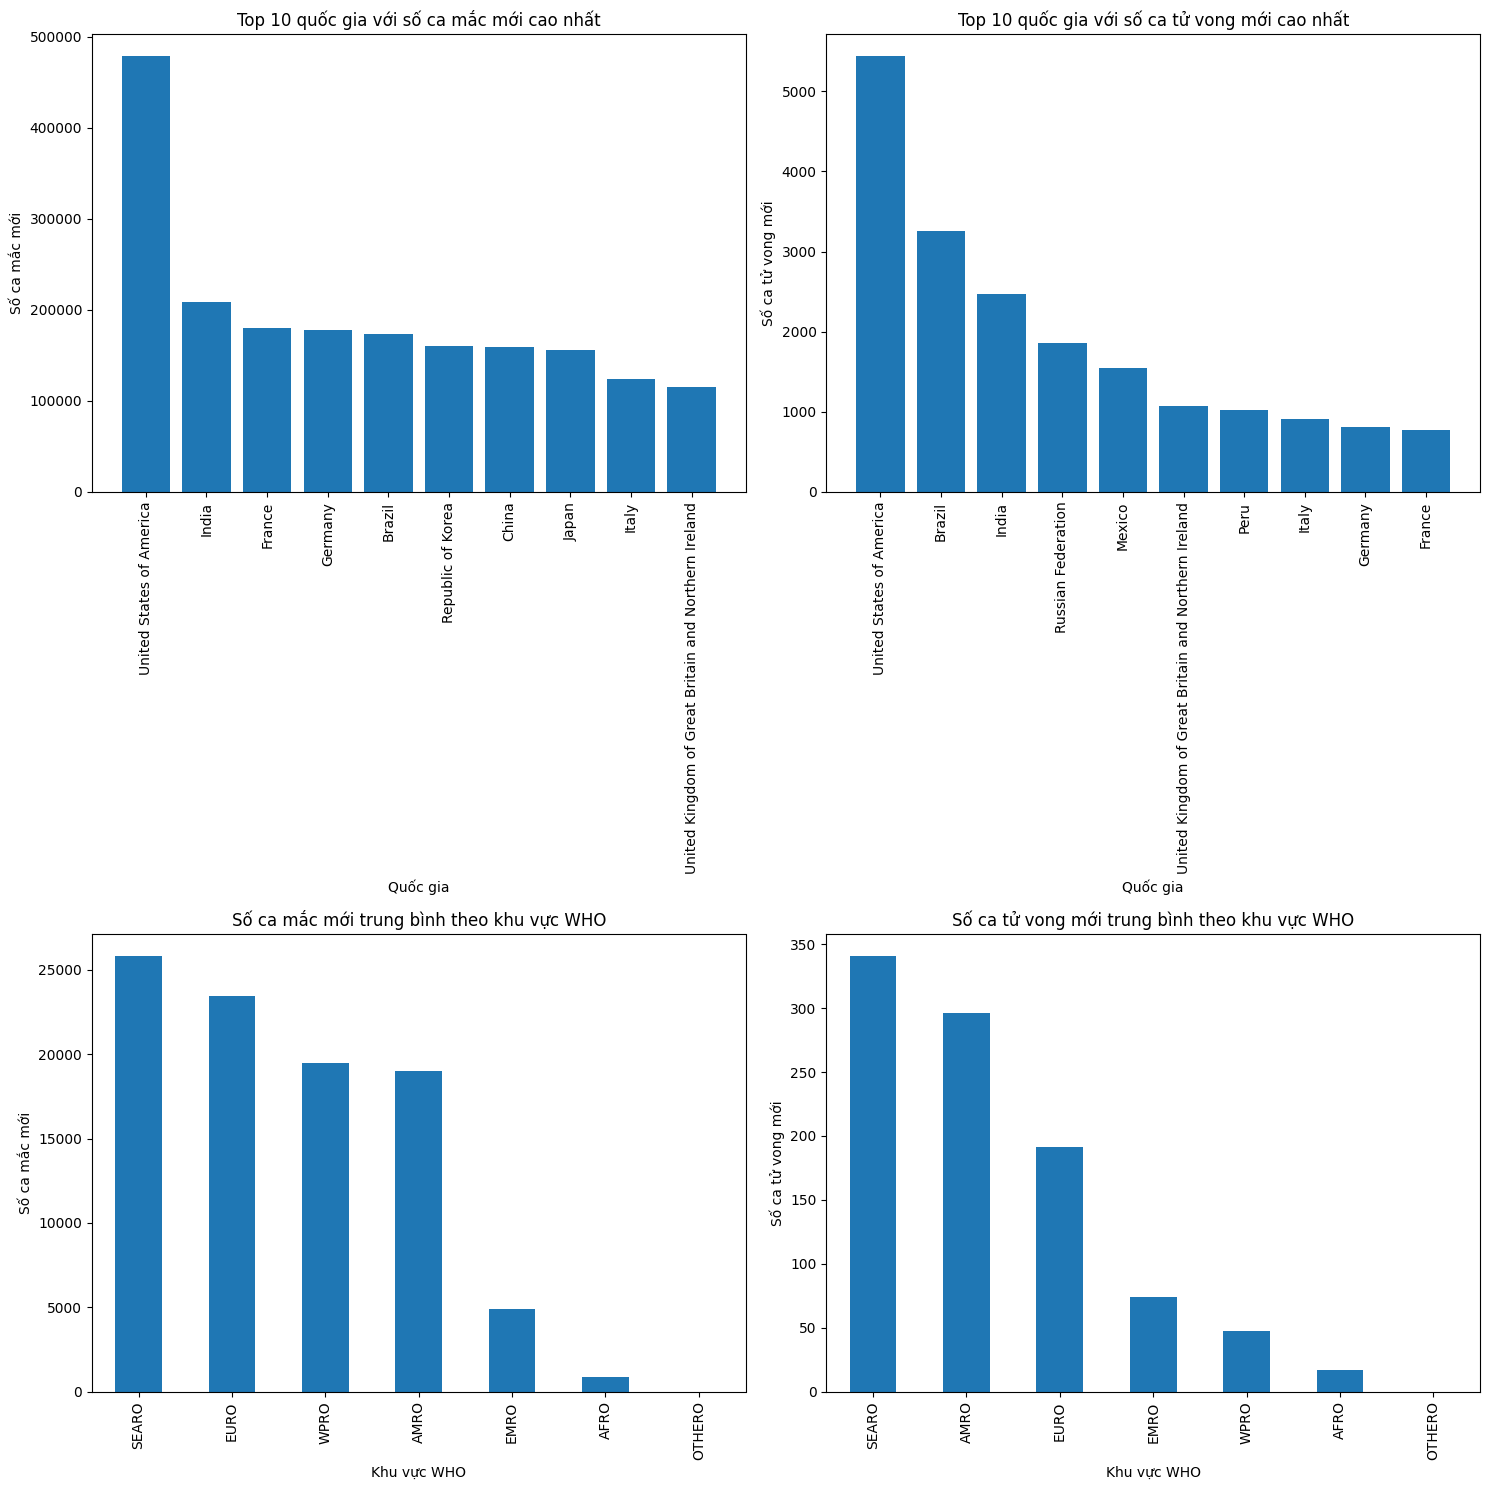

In [36]:
import matplotlib.pyplot as plt

# Tạo một hình vẽ chứa 4 biểu đồ
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

# Biểu đồ 1: Top 10 quốc gia với số ca mắc mới cao nhất
top_10_countries_new_cases = data.groupby('Country')['New_cases'].mean().sort_values(ascending=False).head(10)
axs[0, 0].bar(top_10_countries_new_cases.index, top_10_countries_new_cases.values)
axs[0, 0].set_title('Top 10 quốc gia với số ca mắc mới cao nhất')
axs[0, 0].set_xlabel('Quốc gia')
axs[0, 0].set_ylabel('Số ca mắc mới')
axs[0, 0].tick_params(axis='x', rotation=90)

# Biểu đồ 2: Top 10 quốc gia với số ca tử vong mới cao nhất
top_10_countries_new_deaths = data.groupby('Country')['New_deaths'].mean().sort_values(ascending=False).head(10)
axs[0, 1].bar(top_10_countries_new_deaths.index, top_10_countries_new_deaths.values)
axs[0, 1].set_title('Top 10 quốc gia với số ca tử vong mới cao nhất')
axs[0, 1].set_xlabel('Quốc gia')
axs[0, 1].set_ylabel('Số ca tử vong mới')
axs[0, 1].tick_params(axis='x', rotation=90)

# Biểu đồ 3: Số ca mắc mới trung bình theo khu vực WHO
data.groupby('WHO_region')['New_cases'].mean().sort_values(ascending=False).plot.bar(ax=axs[1, 0])
axs[1, 0].set_title('Số ca mắc mới trung bình theo khu vực WHO')
axs[1, 0].set_xlabel('Khu vực WHO')
axs[1, 0].set_ylabel('Số ca mắc mới')
axs[1, 0].tick_params(axis='x', rotation=90)

# Biểu đồ 4: Số ca tử vong mới trung bình theo khu vực WHO
data.groupby('WHO_region')['New_deaths'].mean().sort_values(ascending=False).plot.bar(ax=axs[1, 1])
axs[1, 1].set_title('Số ca tử vong mới trung bình theo khu vực WHO')
axs[1, 1].set_xlabel('Khu vực WHO')
axs[1, 1].set_ylabel('Số ca tử vong mới')
axs[1, 1].tick_params(axis='x', rotation=90)
# Hiển thị hình vẽ
plt.tight_layout()
plt.show()


Dựa vào biểu đồ phân tích numerical và categorical ta thấy được:
*  Trung bình ca mắc mới(new_cases) ở nước Mỹ đứng đầu với  gần 500.000 ca và tiếp theo là Ấn độ với hơn 200.00 ca và  Pháp gần 200.000 ca,..
* Về trung bình số ca tử vong thì Mỹ vẫn đứng đầu với hơn 5.000 ca, Brazil hơn 3.000 ca và Ấn độ 2.500 ca,...
* Xét về khu vực tổ chức y tế thế giới WHO  ta thấy được trung bình ca mắc mới thì khu vực SEARO (Khu vực Đông Nam Á): Bao gồm các quốc gia ở Đông Nam Á đứng đầu với 25.000 ca , tiếp theo là Châu Âu gần 25.000 ca. Khu vực AFRO (Châu Phi) thấp nhất khoảng 1.000 ca
* Còn về số ca tử vong mới thì khu vực ĐNÁ vẫn đứng đầu với trung bình gần 350 ca , tiếp theo là ARMO(Châu Mỹ) gần 300 ca.


## Đa biến

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-38-90f6318010e7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.drop(['year','year_month','month','day'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)


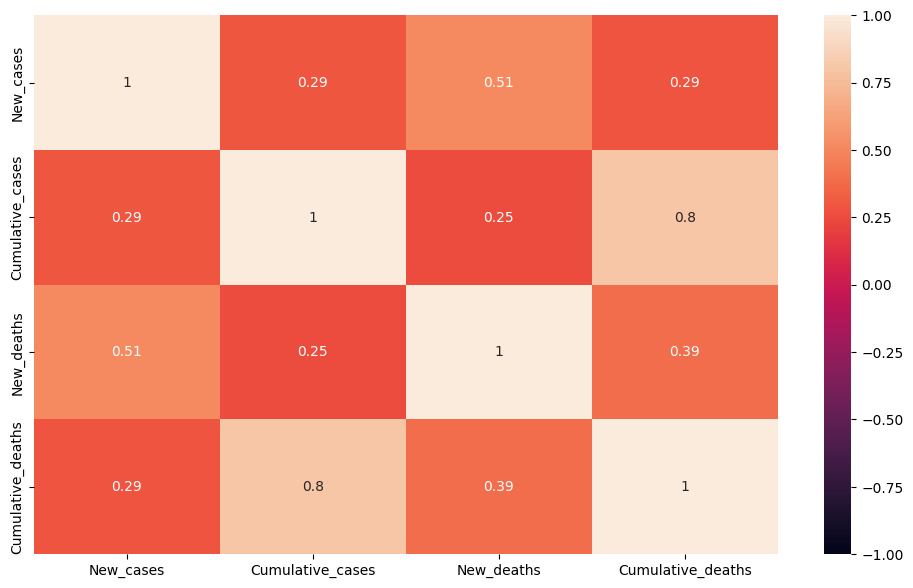

In [38]:
plt.figure(figsize=(12, 7))
sns.heatmap(data.drop(['year','year_month','month','day'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

Dựa vào biểu đồ Heat Map ta thấy được các biến có mối quan hệ tương quan mạnh với nhau và không có tương quan âm, ví dụ như số ca mắc mới (new_cases) với số ca tử vong mới (new_deaths) với hệ số tương quan tích cực là 0.51 nếu như số ca mắc mới tăng thì đồng nghĩa số ca tử vong sẽ tăng theo hay tổng số ca mắc và tổng số ca tử vong có mối tương quan mạnh 0.8

## Câu hỏi phân tích:

1. Quốc gia nào có số ca mắc mới cao nhất?

2. Quốc gia nào ghi nhận tổng số ca mắc cao nhất tính đến thời điểm hiện tại?

3. Năm nào có trung bình ca mắc mới và tử vong mới cao nhất?

4. Tháng nào trong năm 2020 có tổng số ca mắc và tử vong cao nhất?

5. Tháng nào trong năm 2021 có tổng số ca mắc và tử vong cao nhất?

6. Tháng nào trong năm 2022 có tổng số ca mắc và tử vong cao nhất?

7. Tháng nào trong năm 2023 có tổng số ca mắc và tử vong cao nhất?

8. Quốc gia nào ghi nhận số ca tử vong mới nhiều nhất trong một ngày?

9. Quốc gia nào có tổng số ca tử vong cao nhất tính đến thời điểm hiện tại?

10. Trong WHO Region(Khu vực y tế thế giới)khu vực nào có tổng số ca mắc cao nhất tính đến thời điểm hiện tại ?

11. Trong WHO Region(Khu vực y tế thế giới)khu vực nào có tổng số ca tử vong cao nhất tính đến thời điểm hiện tại?

12. Quốc gia nào ghi nhận số ca mắc mới đầu tiên trong tập dữ liệu?

13. Quốc gia nào ghi nhận số ca tử vong đầu tiên trong tập dữ liệu?

14. Trong mỗi khu vực WHO thì quốc gia nào có tổng ca mắc cao nhất?

15. Trong mỗi khu vực WHO thì quốc gia nào có tổng ca tử vong cao nhất?

16. Nước nào có ca tử vong đầu tiên trong mỗi khu vực Tây Thái Bình Dương (WPRO)?

17. Việt Nam có tổng ca mắc đứng thứ mấy trên thế giới?

18. Việt Nam có tổng ca tử vong đứng thứ mấy trên thế giới?

19. Việt Nam có ca mắc đầu tiên được ghi nhận khi nào?
20. Việt Nam có ca tử vong đầu tiên ghi nhận khi nào?
21. Tổng ca mắc và tử vong trên thế giới đến thời điểm hiện tại là bao nhiêu?


In [39]:
#1. Quốc gia nào có số ca mắc mới cao nhất?

country_new_cases = data[['Country', 'New_cases']]
# Sắp xếp dữ liệu theo số ca mắc mới giảm dần và lấy quốc gia có số ca mắc mới cao nhất
country_new_cases_sorted = country_new_cases.sort_values(by='New_cases', ascending=False)
country_new_cases_sorted.head()

,Country,New_cases
9658,China,11098550.0
9661,China,8061762.0
49570,United States of America,5650933.0
49571,United States of America,5042888.0
49569,United States of America,4682897.0


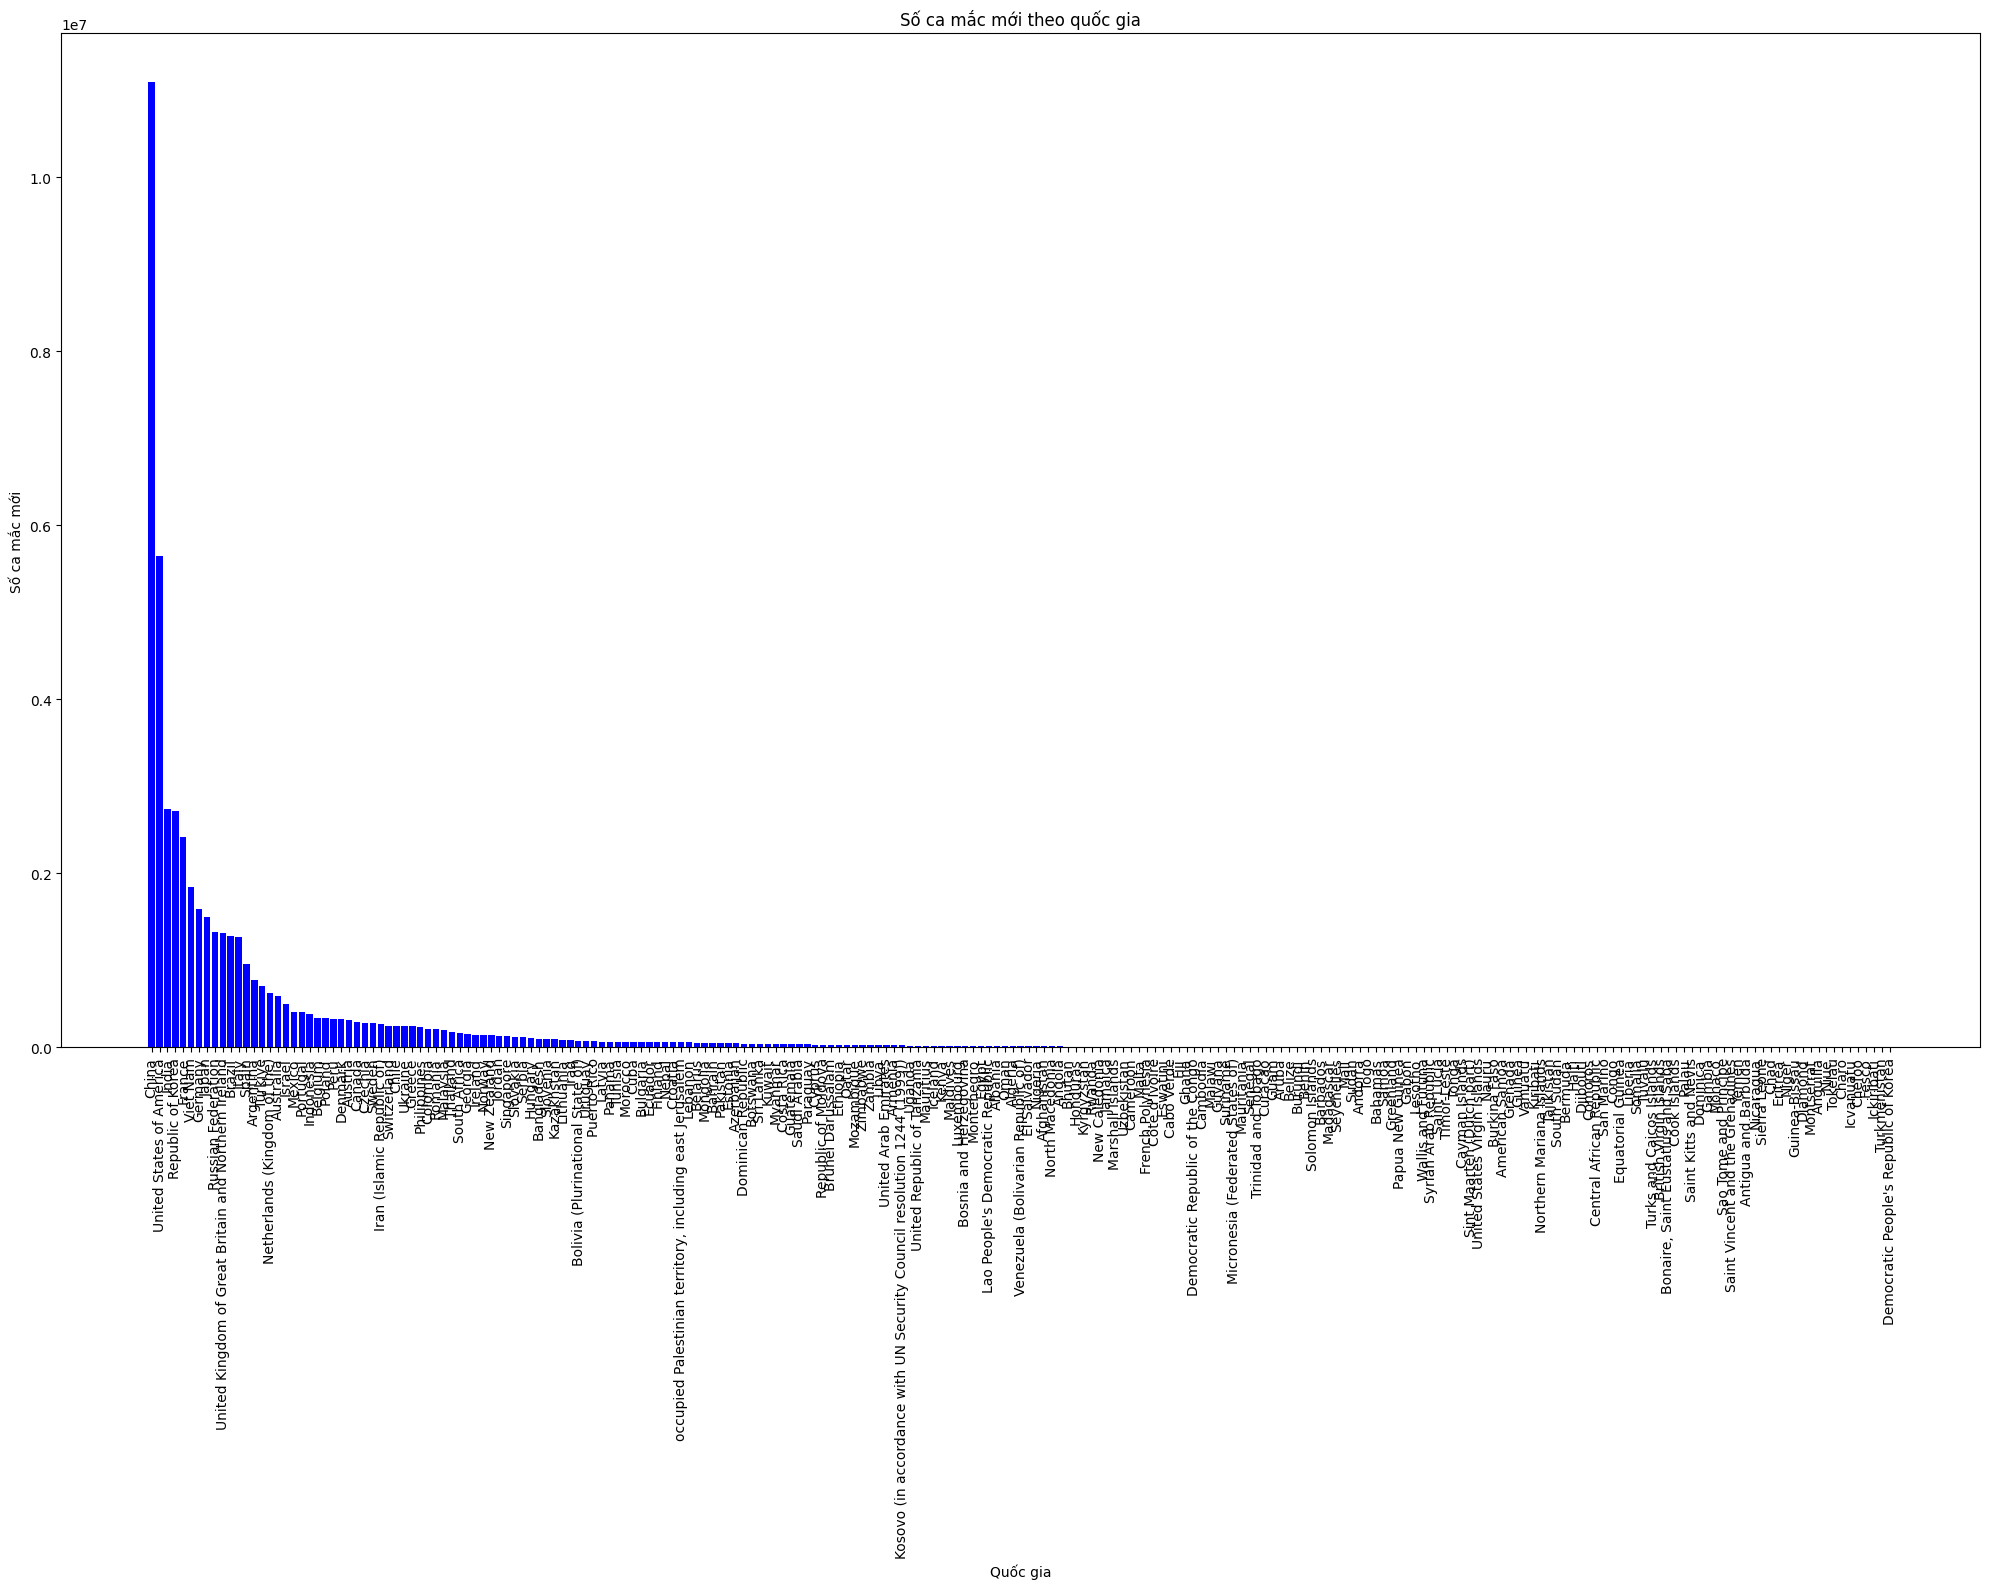

Quốc gia có số ca mắc mới cao nhất là: China


In [40]:
# Biểu đồ cột
plt.figure(figsize=(20, 16))
plt.bar(country_new_cases_sorted['Country'], country_new_cases_sorted['New_cases'], color='blue')
plt.xlabel('Quốc gia')
plt.ylabel('Số ca mắc mới')
plt.title('Số ca mắc mới theo quốc gia')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print("Quốc gia có số ca mắc mới cao nhất là:", country_new_cases_sorted.iloc[0]['Country'])

In [41]:
#2 Quốc gia nào ghi nhận tổng số ca mắc cao nhất tính đến thời điểm hiện tại?
total_cases_by_country = data.groupby('Country')['Cumulative_cases'].max()
# Sắp xếp theo thứ tự giảm dần và lấy 5 quốc gia có tổng số ca mắc cao nhất
top_countries = total_cases_by_country.sort_values(ascending=False).head(5)
print(top_countries)

Country
United States of America    103436829.0
China                        99331724.0
India                        45028053.0
France                       38997490.0
Germany                      38437756.0
Name: Cumulative_cases, dtype: float64


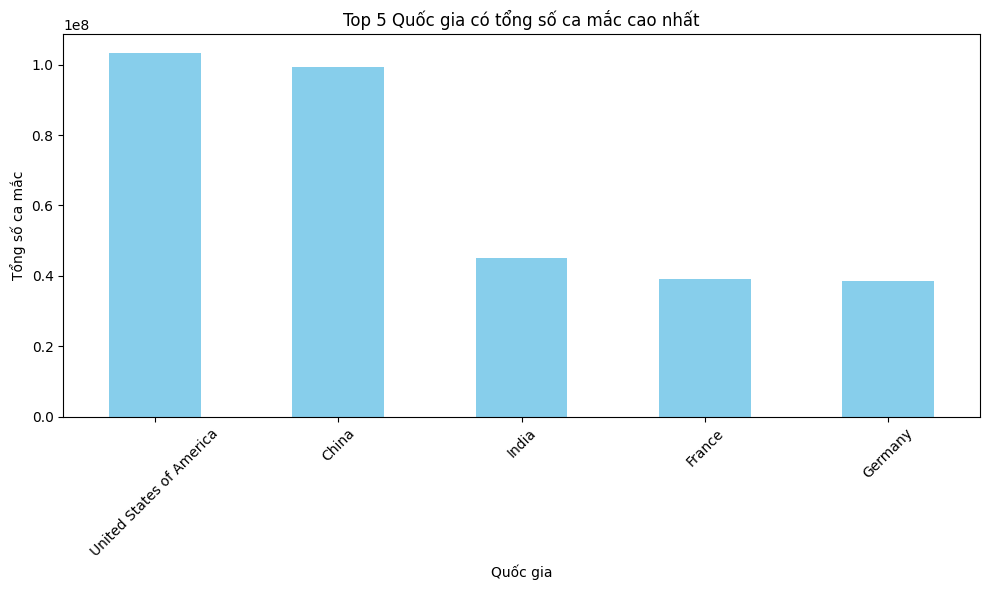

Quốc gia có tổng số ca mắc cao nhất là: United States of America


In [42]:
# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='skyblue')
plt.title('Top 5 Quốc gia có tổng số ca mắc cao nhất')
plt.xlabel('Quốc gia')
plt.ylabel('Tổng số ca mắc')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print("Quốc gia có tổng số ca mắc cao nhất là:", top_countries.index[0])

In [43]:
#3. Năm nào có trung bình ca mắc mới và tử vong mới cao nhất?
average_new_cases_by_year = data.groupby('year')['New_cases'].mean()
print(average_new_cases_by_year)

year
2020     6986.988420
2021    17397.691585
2022    33302.240989
2023     3795.364476
2024      544.811772
Name: New_cases, dtype: float64


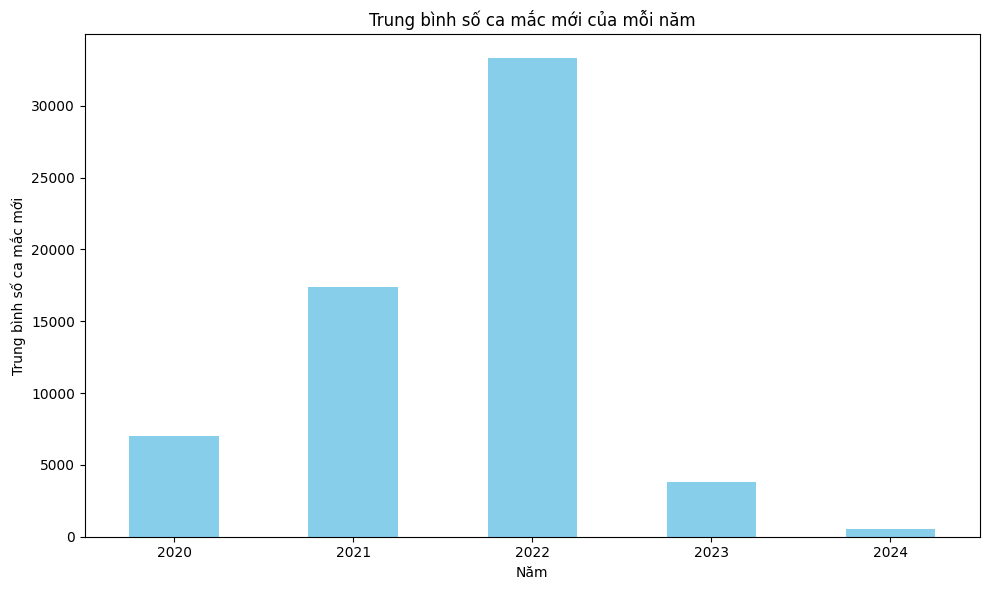

In [44]:
plt.figure(figsize=(10, 6))
average_new_cases_by_year.plot(kind='bar', color='skyblue')
plt.title('Trung bình số ca mắc mới của mỗi năm')
plt.xlabel('Năm')
plt.ylabel('Trung bình số ca mắc mới')
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

In [45]:
average_new_deaths_by_year = data.groupby('year')['New_deaths'].mean()
print(average_new_deaths_by_year)

year
2020    164.801480
2021    308.373771
2022    108.092983
2023     21.976237
2024     10.641009
Name: New_deaths, dtype: float64


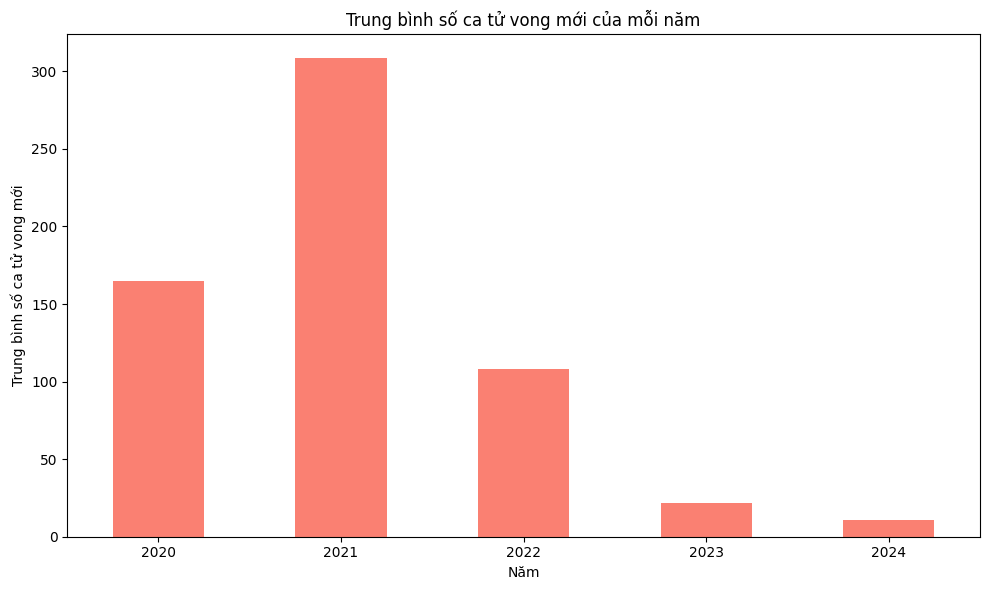

In [46]:
plt.figure(figsize=(10, 6))
average_new_deaths_by_year.plot(kind='bar', color='salmon')
plt.title('Trung bình số ca tử vong mới của mỗi năm')
plt.xlabel('Năm')
plt.ylabel('Trung bình số ca tử vong mới')
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

In [47]:
# 4 Tháng nào trong năm 2020 có tổng số ca mắc và tử vong cao nhất?
# Lọc dữ liệu cho năm 2020
data_2020 = data[data['year'] == 2020]

# Nhóm dữ liệu theo tháng và tính tổng số ca mắc cho mỗi tháng trong năm 2020
total_cases_by_month_2020 = data_2020.groupby('month')['New_cases'].sum()

# Sắp xếp dữ liệu từ cao đến thấp
total_cases_by_month_2020_sorted = total_cases_by_month_2020.sort_values(ascending=False)
total_cases_by_month_2020_sorted

month
11    19554814.0
12    17240735.0
10    10178139.0
8      9251680.0
9      8131138.0
7      6068633.0
6      3932768.0
5      3161560.0
4      2036265.0
3       610888.0
2        76909.0
1         2033.0
Name: New_cases, dtype: float64

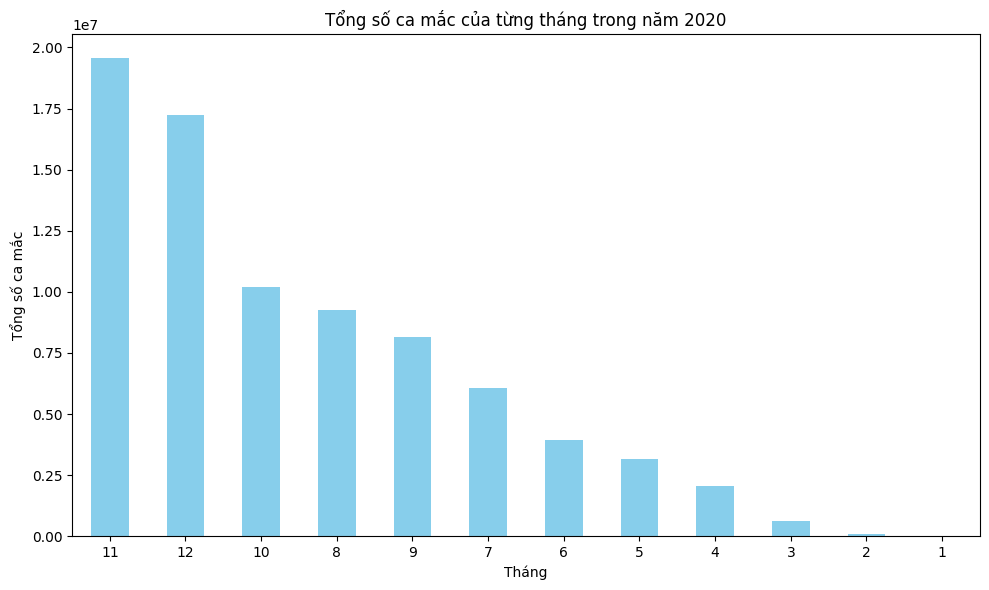

In [48]:
# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
total_cases_by_month_2020_sorted.plot(kind='bar', color='skyblue')
plt.title('Tổng số ca mắc của từng tháng trong năm 2020')
plt.xlabel('Tháng')
plt.ylabel('Tổng số ca mắc')
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

In [49]:
#4  Nhóm dữ liệu theo tháng và tính tổng số ca tử vong cho mỗi tháng trong năm 2020
total_deaths_by_month_2020 = data_2020.groupby('month')['New_deaths'].sum()
# Sắp xếp dữ liệu từ cao đến thấp
total_deaths_by_month_2020_sorted = total_deaths_by_month_2020.sort_values(ascending=False)
total_deaths_by_month_2020_sorted

month
12    329306.0
11    323577.0
8     219281.0
5     184293.0
4     178802.0
7     162465.0
10    156678.0
9     155761.0
6     144308.0
3      35801.0
2       2411.0
1         62.0
Name: New_deaths, dtype: float64

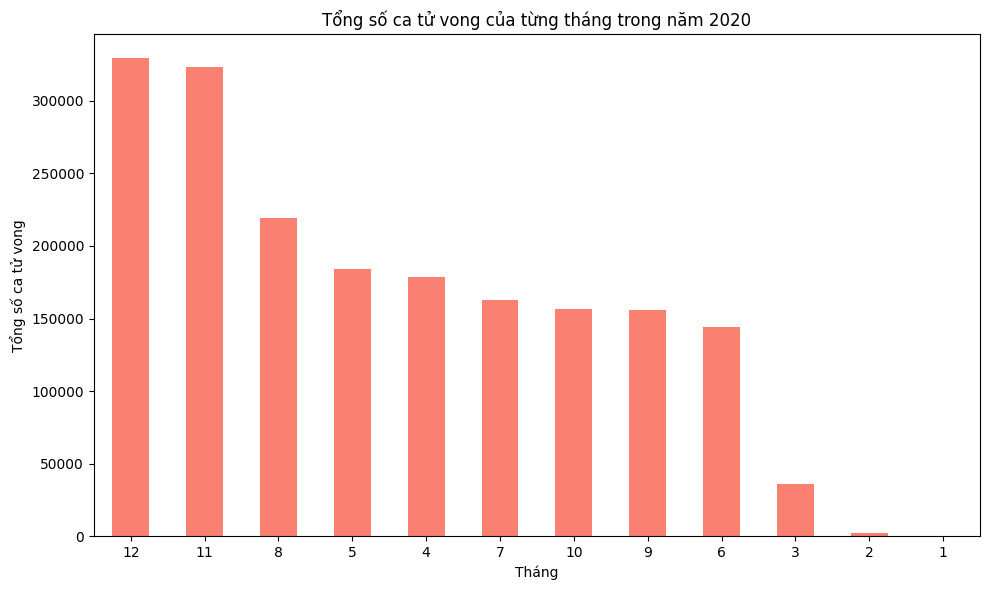

In [50]:
# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
total_deaths_by_month_2020_sorted.plot(kind='bar', color='salmon')
plt.title('Tổng số ca tử vong của từng tháng trong năm 2020')
plt.xlabel('Tháng')
plt.ylabel('Tổng số ca tử vong')
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

In [51]:
#5 Tháng nào trong năm 2021 có tổng số ca mắc và tử vong cao nhất?
# Lọc dữ liệu cho năm 2021
data_2021 = data[data['year'] == 2021]

# Nhóm dữ liệu theo tháng và tính tổng số ca mắc cho mỗi tháng trong năm 2021
total_cases_by_month_2021 = data_2021.groupby('month')['New_cases'].sum()

# Sắp xếp dữ liệu từ cao đến thấp
total_cases_by_month_2021_sorted = total_cases_by_month_2021.sort_values(ascending=False)
total_cases_by_month_2021_sorted

month
5     23711567.0
8     22174147.0
1     22046537.0
4     19585662.0
12    19332255.0
9     15456047.0
10    15068263.0
11    14550812.0
7     13359825.0
3     12847072.0
2     11003166.0
6     10781521.0
Name: New_cases, dtype: float64

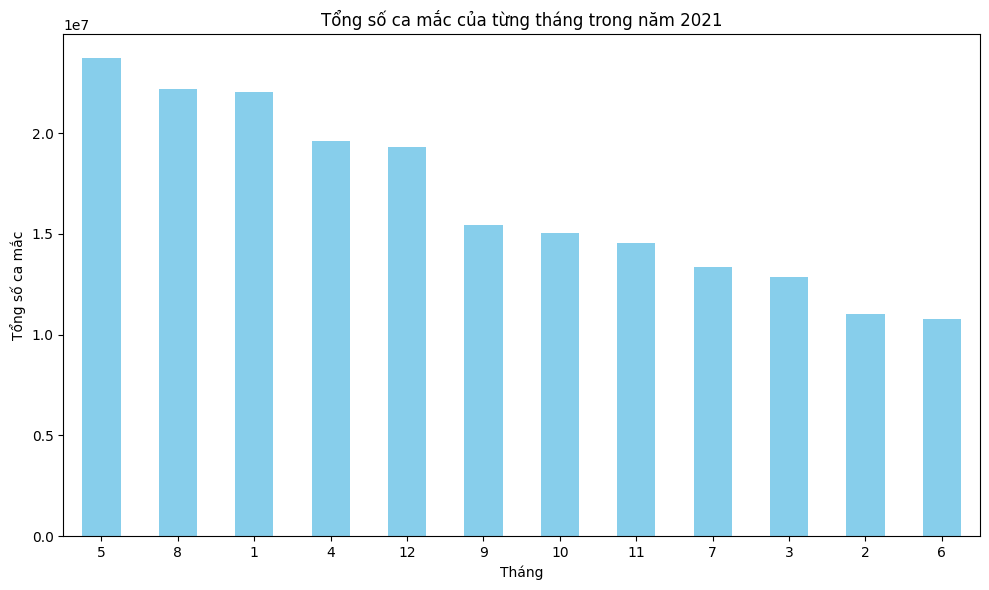

In [52]:
# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
total_cases_by_month_2021_sorted.plot(kind='bar', color='skyblue')
plt.title('Tổng số ca mắc của từng tháng trong năm 2021')
plt.xlabel('Tháng')
plt.ylabel('Tổng số ca mắc')
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

In [53]:
#5 Nhóm dữ liệu theo tháng và tính tổng số ca tử vong cho mỗi tháng trong năm 2021
total_deaths_by_month_2021 = data_2021.groupby('month')['New_deaths'].sum()

# Sắp xếp dữ liệu từ cao đến thấp
total_deaths_by_month_2021_sorted = total_deaths_by_month_2021.sort_values(ascending=False)
total_deaths_by_month_2021_sorted

month
1     483710.0
5     440288.0
8     344771.0
4     332924.0
2     303077.0
6     257906.0
3     253216.0
10    246818.0
9     246105.0
7     232730.0
11    204535.0
12    197443.0
Name: New_deaths, dtype: float64

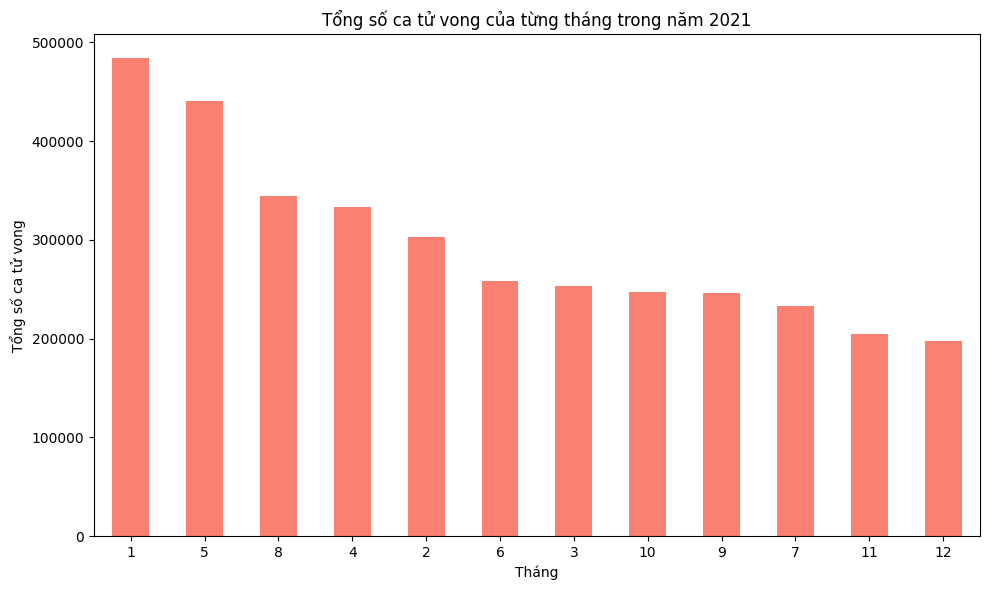

In [54]:
# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
total_deaths_by_month_2021_sorted.plot(kind='bar', color='salmon')
plt.title('Tổng số ca tử vong của từng tháng trong năm 2021')
plt.xlabel('Tháng')
plt.ylabel('Tổng số ca tử vong')
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

In [55]:
#Tháng nào trong năm 2022 có tổng số ca mắc và tử vong cao nhất?

# Lọc dữ liệu cho năm 2022
data_2022 = data[data['year'] == 2022]

# Nhóm dữ liệu theo tháng và tính tổng số ca mắc cho mỗi tháng trong năm 2022
total_cases_by_month_2022 = data_2022.groupby('month')['New_cases'].sum()

# Sắp xếp dữ liệu từ cao đến thấp
total_cases_by_month_2022_sorted = total_cases_by_month_2022.sort_values(ascending=False)
total_cases_by_month_2022_sorted

month
1     94390946.0
2     59565940.0
3     45977860.0
7     32907389.0
4     26887180.0
12    26571313.0
8     22814433.0
5     18665813.0
6     15065574.0
10    15041964.0
9     14146329.0
11    10474799.0
Name: New_cases, dtype: float64

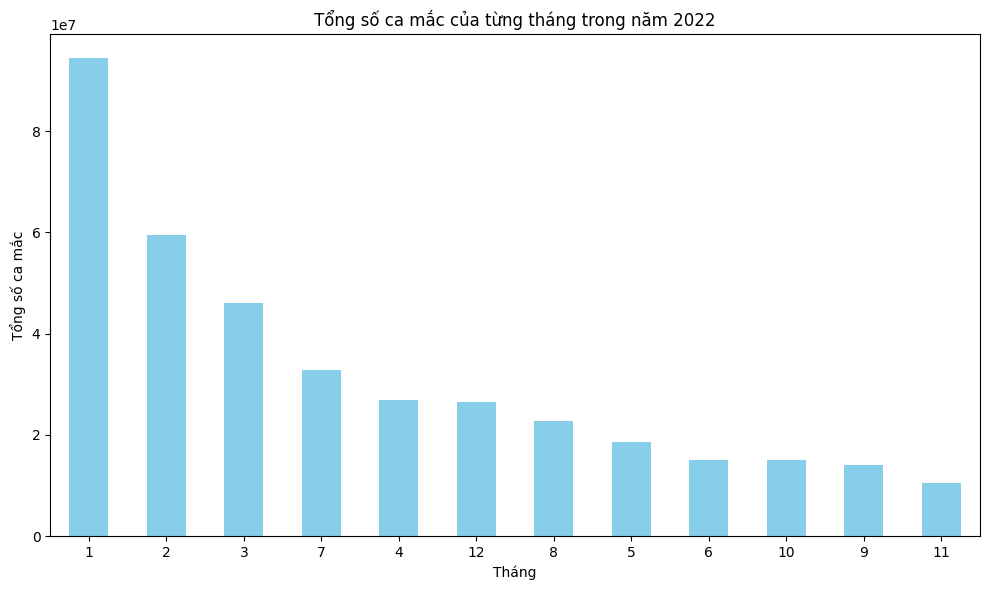

In [56]:
# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
total_cases_by_month_2022_sorted.plot(kind='bar', color='skyblue')
plt.title('Tổng số ca mắc của từng tháng trong năm 2022')
plt.xlabel('Tháng')
plt.ylabel('Tổng số ca mắc')
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

In [57]:
# Nhóm dữ liệu theo tháng và tính tổng số ca tử vong cho mỗi tháng trong năm 2022
total_deaths_by_month_2022 = data_2022.groupby('month')['New_deaths'].sum()

# Sắp xếp dữ liệu từ cao đến thấp
total_deaths_by_month_2022_sorted = total_deaths_by_month_2022.sort_values(ascending=False)
total_deaths_by_month_2022_sorted

month
2     281055.0
1     267642.0
3     175867.0
4      85678.0
7      72653.0
8      65549.0
5      60991.0
10     55595.0
12     52070.0
9      46099.0
11     40231.0
6      38126.0
Name: New_deaths, dtype: float64

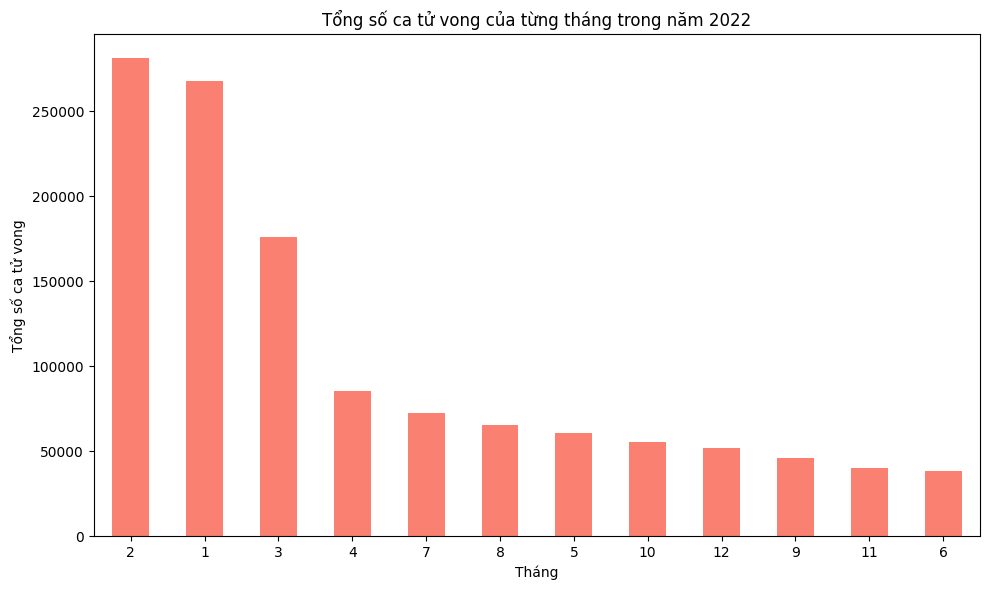

In [58]:
# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
total_deaths_by_month_2022_sorted.plot(kind='bar', color='salmon')
plt.title('Tổng số ca tử vong của từng tháng trong năm 2022')
plt.xlabel('Tháng')
plt.ylabel('Tổng số ca tử vong')
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

In [59]:
#7Tháng nào trong năm 2023 có tổng số ca mắc và tử vong cao nhất?

# Lọc dữ liệu cho năm 2023
data_2023 = data[data['year'] == 2023]

# Nhóm dữ liệu theo tháng và tính tổng số ca mắc cho mỗi tháng trong năm 2023
total_cases_by_month_2023 = data_2023.groupby('month')['New_cases'].sum()

# Sắp xếp dữ liệu từ cao đến thấp
total_cases_by_month_2023_sorted = total_cases_by_month_2023.sort_values(ascending=False)
total_cases_by_month_2023_sorted

month
1     23016114.0
2      4656763.0
3      3634355.0
4      3602175.0
5      1896307.0
12     1601032.0
8      1561191.0
7      1129758.0
6       925662.0
9       863431.0
11      764020.0
10      751161.0
Name: New_cases, dtype: float64

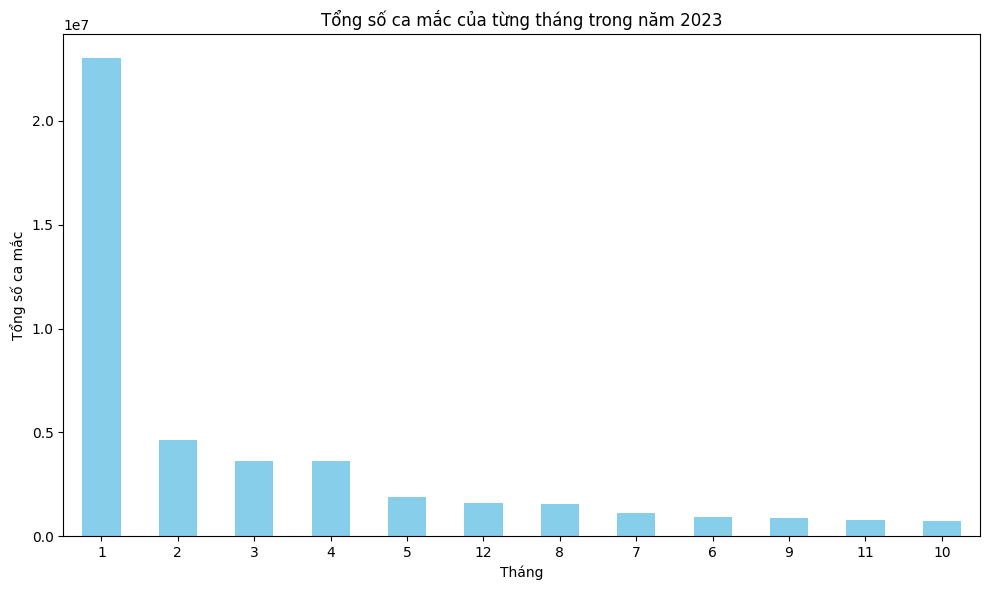

In [60]:
# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
total_cases_by_month_2023_sorted.plot(kind='bar', color='skyblue')
plt.title('Tổng số ca mắc của từng tháng trong năm 2023')
plt.xlabel('Tháng')
plt.ylabel('Tổng số ca mắc')
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

In [61]:
# Nhóm dữ liệu theo tháng và tính tổng số ca tử vong cho mỗi tháng trong năm 2023
total_deaths_by_month_2023 = data_2023.groupby('month')['New_deaths'].sum()

# Sắp xếp dữ liệu từ cao đến thấp
total_deaths_by_month_2023_sorted = total_deaths_by_month_2023.sort_values(ascending=False)
total_deaths_by_month_2023_sorted

month
1     68009.0
2     48407.0
4     26828.0
3     26676.0
12    17422.0
5     15353.0
10    13905.0
11    10395.0
9      9014.0
6      8453.0
8      6685.0
7      5953.0
Name: New_deaths, dtype: float64

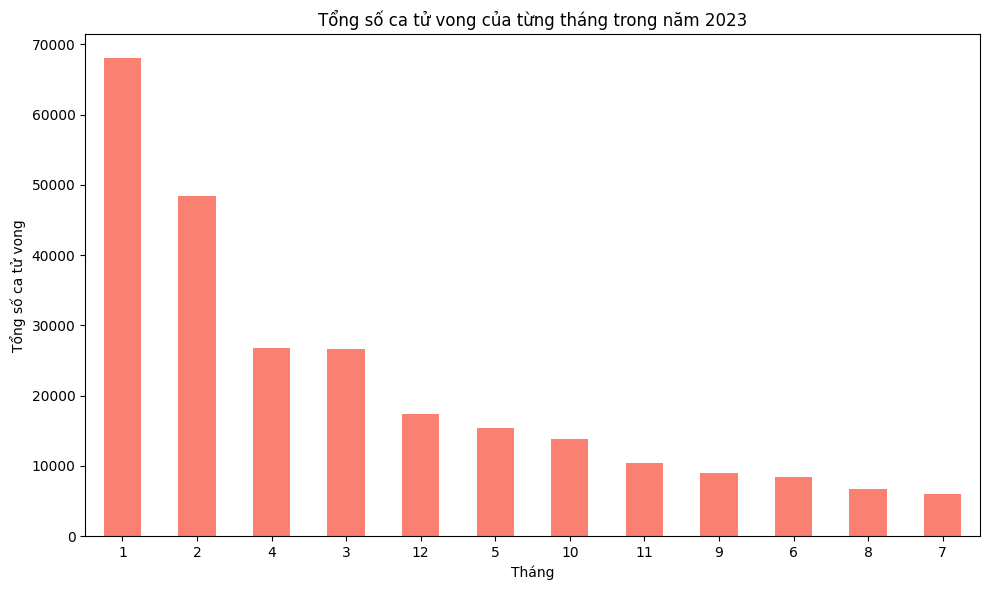

In [62]:
# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
total_deaths_by_month_2023_sorted.plot(kind='bar', color='salmon')
plt.title('Tổng số ca tử vong của từng tháng trong năm 2023')
plt.xlabel('Tháng')
plt.ylabel('Tổng số ca tử vong')
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

In [63]:
#8 Quốc gia nào ghi nhận số ca tử vong mới nhiều nhất trong một ngày?
sorted_data = data.sort_values(by='New_deaths', ascending=False)

# Lấy 10 dòng đầu tiên có số ca tử vong mới cao nhất trong 1 ngày
top_10_with_highest_new_deaths = sorted_data.head(10)
print(top_10_with_highest_new_deaths[['Country', 'New_deaths','Date_reported']])

                        Country  New_deaths Date_reported
22104                     India     28982.0    2021-05-23
22103                     India     27922.0    2021-05-16
22102                     India     26820.0    2021-05-09
22105                     India     26706.0    2021-05-30
22107                     India     23625.0    2021-06-13
49518  United States of America     23312.0    2021-01-17
22101                     India     23231.0    2021-05-02
49519  United States of America     22495.0    2021-01-24
49520  United States of America     22249.0    2021-01-31
49517  United States of America     21497.0    2021-01-10


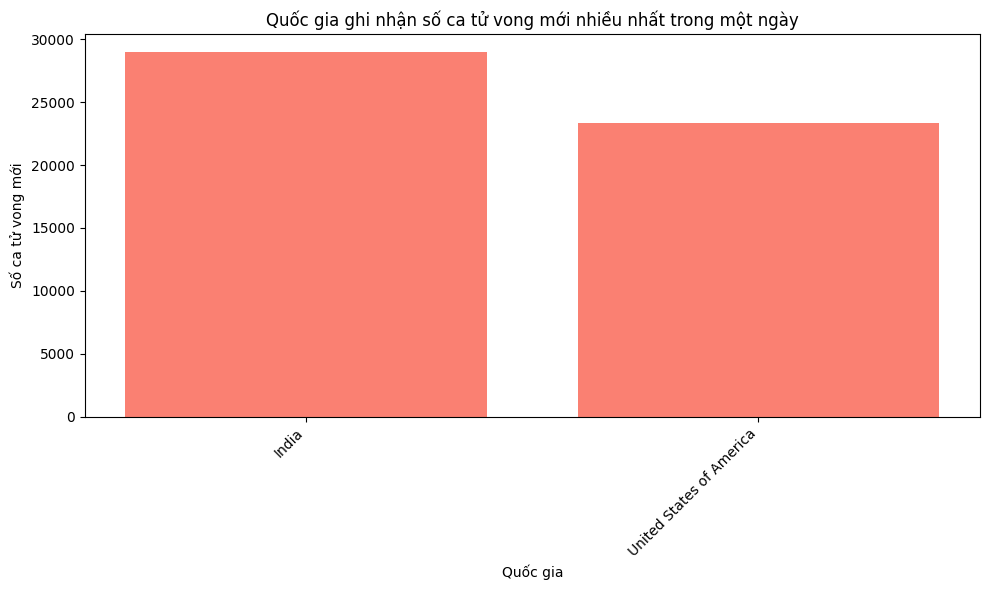

In [64]:
# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
plt.bar(top_10_with_highest_new_deaths['Country'], top_10_with_highest_new_deaths['New_deaths'], color='salmon')
plt.title('Quốc gia ghi nhận số ca tử vong mới nhiều nhất trong một ngày')
plt.xlabel('Quốc gia')
plt.ylabel('Số ca tử vong mới')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [65]:
#9 Quốc gia nào có tổng số ca tử vong cao nhất tính đến thời điểm hiện tại?
# Nhóm dữ liệu theo quốc gia và tính tổng số ca tử vong tích lũy của mỗi quốc gia
grouped_data = data.groupby('Country')['Cumulative_deaths'].max().reset_index()

# Sắp xếp dữ liệu theo tổng số ca tử vong giảm dần
sorted_data = grouped_data.sort_values(by='Cumulative_deaths', ascending=False)

# Lấy 10 quốc gia đầu tiên có tổng số ca tử vong cao nhất
top_10_countries_with_highest_cumulative_deaths = sorted_data.head(10)
top_10_countries_with_highest_cumulative_deaths

,Country,Cumulative_deaths
210,United States of America,1174676.0
28,Brazil,702116.0
95,India,533472.0
164,Russian Federation,402097.0
128,Mexico,334958.0
207,United Kingdom of Great Britain and Northern I...,232112.0
155,Peru,221583.0
101,Italy,196495.0
79,Germany,174979.0
74,France,167985.0


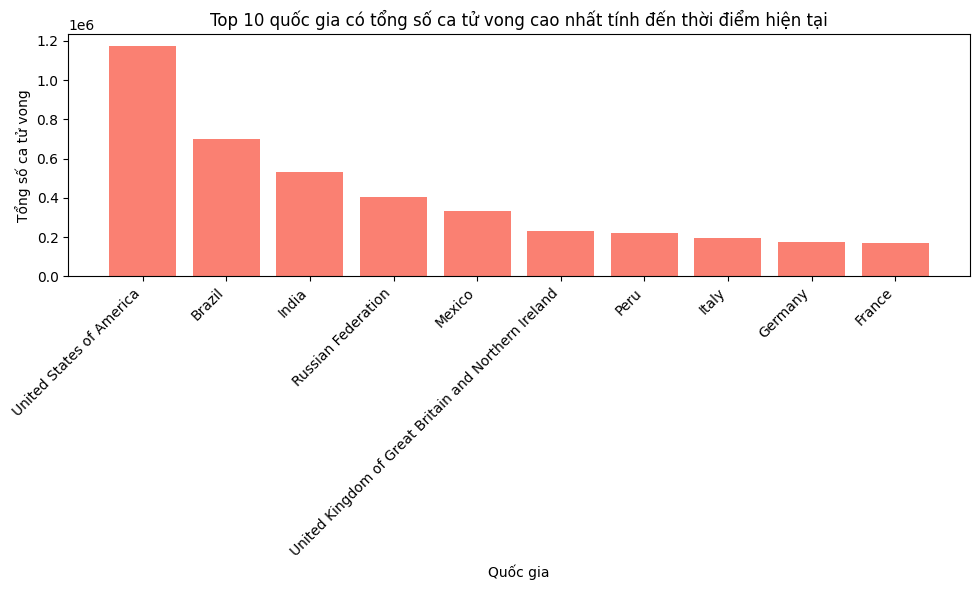

In [66]:
# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
plt.bar(top_10_countries_with_highest_cumulative_deaths['Country'], top_10_countries_with_highest_cumulative_deaths['Cumulative_deaths'], color='salmon')
plt.title('Top 10 quốc gia có tổng số ca tử vong cao nhất tính đến thời điểm hiện tại')
plt.xlabel('Quốc gia')
plt.ylabel('Tổng số ca tử vong')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [67]:
#10 Trong WHO Region(Khu vực y tế thế giới) khu vực nào có tổng số ca mắc cao nhất tính đến thời điểm hiện tại ?

# Nhóm dữ liệu theo WHO Region và tính tổng số ca mắc tích lũy của mỗi khu vực
cases_by_region = data.groupby('WHO_region')['Cumulative_cases'].max()

# Sắp xếp dữ liệu theo tổng số ca mắc giảm dần
sorted_cases_by_region = cases_by_region.sort_values(ascending=False)

# In ra tất cả các khu vực và tổng số ca mắc tích lũy của mỗi khu vực
print("Tổng số ca mắc tích lũy của mỗi Khu vực y tế thế giới:")
print(sorted_cases_by_region)

Tổng số ca mắc tích lũy của mỗi Khu vực y tế thế giới:
WHO_region
AMRO      103436829.0
WPRO       99331724.0
SEARO      45028053.0
EURO       38997490.0
EMRO        7627186.0
AFRO        4072636.0
OTHERO          712.0
Name: Cumulative_cases, dtype: float64


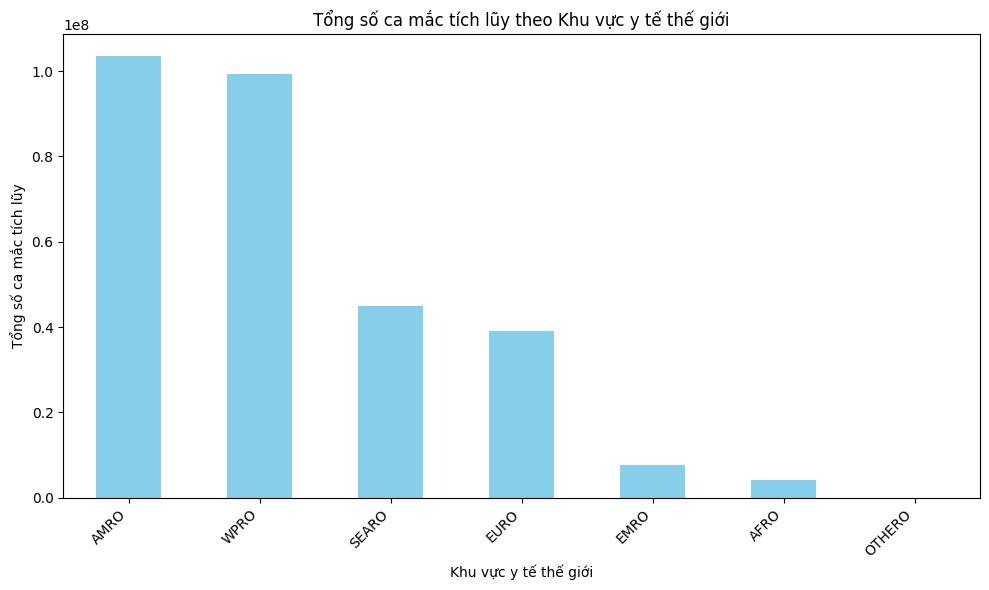

In [68]:
plt.figure(figsize=(10, 6))
sorted_cases_by_region.plot(kind='bar', color='skyblue')
plt.title('Tổng số ca mắc tích lũy theo Khu vực y tế thế giới')
plt.xlabel('Khu vực y tế thế giới')
plt.ylabel('Tổng số ca mắc tích lũy')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [69]:
#11 Trong WHO Region(Khu vực y tế thế giới) nào có tổng số ca tử vong cao nhất tính đến thời điểm hiện tại?
# Nhóm dữ liệu theo WHO Region và tính tổng số ca tử vong tích lũy của mỗi khu vực
deaths_by_region = data.groupby('WHO_region')['Cumulative_deaths'].max()

# Sắp xếp dữ liệu theo tổng số ca tử vong giảm dần
sorted_deaths_by_region = deaths_by_region.sort_values(ascending=False)
sorted_deaths_by_region

WHO_region
AMRO      1174676.0
SEARO      533472.0
EURO       402097.0
EMRO       146811.0
WPRO       121956.0
AFRO       102595.0
OTHERO         13.0
Name: Cumulative_deaths, dtype: float64

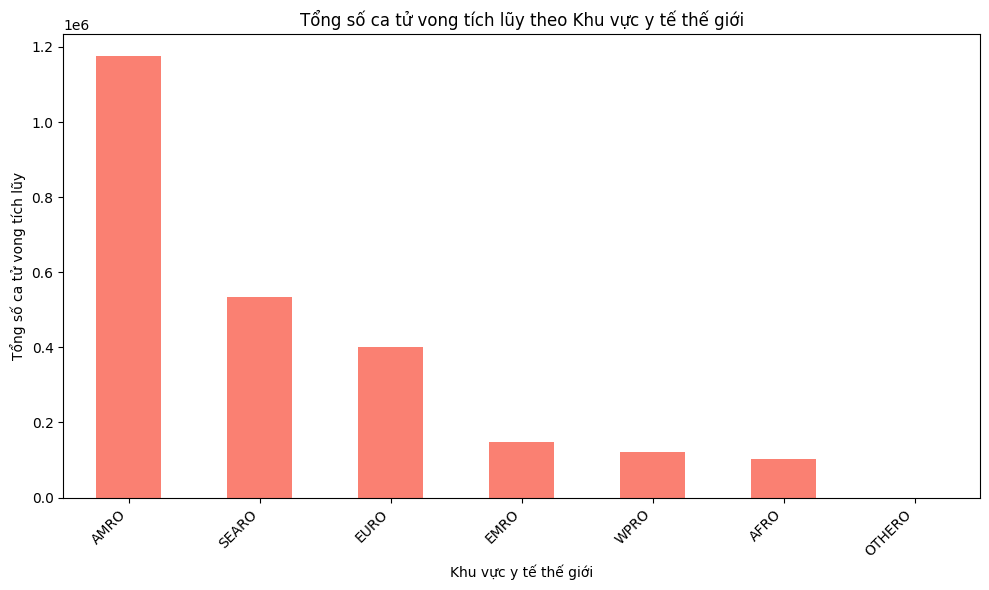

In [70]:
# Trực quan hóa dữ liệu
plt.figure(figsize=(10, 6))
sorted_deaths_by_region.plot(kind='bar', color='salmon')
plt.title('Tổng số ca tử vong tích lũy theo Khu vực y tế thế giới')
plt.xlabel('Khu vực y tế thế giới')
plt.ylabel('Tổng số ca tử vong tích lũy')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [71]:
#12 Quốc gia nào ghi nhận số ca mắc mới đầu tiên trong tập dữ liệu?
# Lọc dữ liệu có số ca mắc mới lớn hơn

filtered_data = data[data['New_cases'] >0]

# Sắp xếp dữ liệu lọc theo cột "Date_reported" để lấy 5 dòng đầu tiên
first_5_cases_reported = filtered_data.sort_values(by='Date_reported').head(5)

# Lấy thông tin về quốc gia từ 5 dòng đầu tiên
countries_first_5_cases = first_5_cases_reported[['Country','Date_reported','New_cases']]

print(countries_first_5_cases)


        Country Date_reported  New_cases
17712   Germany    2020-01-05        1.0
9504      China    2020-01-05        1.0
30673    Monaco    2020-01-12        1.0
9505      China    2020-01-12       44.0
46010  Thailand    2020-01-19        6.0


In [72]:
#13.Quốc gia nào ghi nhận số ca tử vong đầu tiên trong tập dữ liệu?
 # Lọc dữ liệu có số ca tử vong mới lớn hơn 0
deaths_data = data[data['New_deaths'] > 0]

# Sắp xếp dữ liệu theo cột "Date_reported" để lấy 5 dòng đầu tiên
first_5_deaths_reported = deaths_data.sort_values(by='Date_reported').head(5)

# Lấy thông tin về quốc gia từ 5 dòng đầu tiên
countries_first_5_deaths = first_5_deaths_reported[['Country','Date_reported','New_deaths']]

print(countries_first_5_deaths)

       Country Date_reported  New_deaths
17712  Germany    2020-01-05         3.0
9505     China    2020-01-12         1.0
9506     China    2020-01-19         2.0
9507     China    2020-01-26        53.0
17715  Germany    2020-01-26         3.0


In [73]:
#14. Trong mỗi khu vực WHO thì quốc gia nào có tổng ca mắc cao nhất?

# Lọc dữ liệu cho khu vực Địa Trung Hải (ERMO)
ERMO_data = data[data['WHO_region'] == 'EMRO']

# Tính tổng số ca mắc cho mỗi quốc gia trong khu vực
total_cases_ERMO = ERMO_data.groupby('Country')['Cumulative_cases'].max()

# Lấy ra 5 quốc gia có tổng số ca mắc cao nhất
top_5_countries = total_cases_ERMO.sort_values(ascending=False).head(5)
top_5_countries

Country
Iran (Islamic Republic of)    7627186.0
Iraq                          2465545.0
Jordan                        1746997.0
Pakistan                      1580631.0
Morocco                       1278988.0
Name: Cumulative_cases, dtype: float64

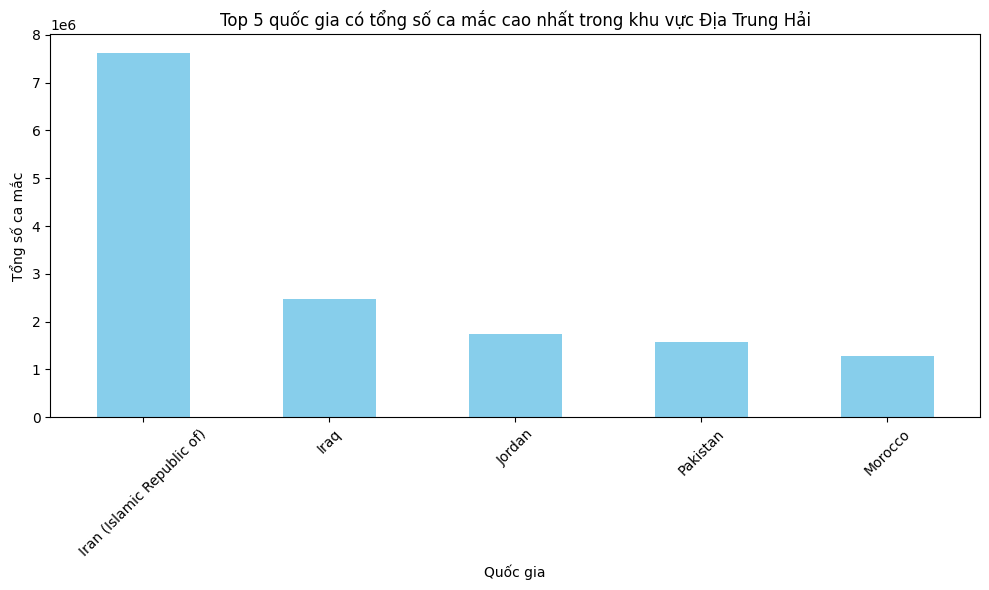

In [74]:
plt.figure(figsize=(10, 6))
top_5_countries.plot(kind='bar', color='skyblue')
plt.title('Top 5 quốc gia có tổng số ca mắc cao nhất trong khu vực Địa Trung Hải')
plt.xlabel('Quốc gia')
plt.ylabel('Tổng số ca mắc')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [75]:
#14. Lọc dữ liệu cho khu vực Châu Âu
europe_data = data[data['WHO_region'] == 'EURO']

# Tính tổng số ca mắc cho mỗi quốc gia trong khu vực
total_cases_by_country = europe_data.groupby('Country')['Cumulative_cases'].max()

# Lấy ra 5 quốc gia có tổng số ca mắc cao nhất
top_5_countries = total_cases_by_country.sort_values(ascending=False).head(5)
top_5_countries

Country
France                                                  38997490.0
Germany                                                 38437756.0
Italy                                                   26709711.0
United Kingdom of Great Britain and Northern Ireland    24905537.0
Russian Federation                                      23931163.0
Name: Cumulative_cases, dtype: float64

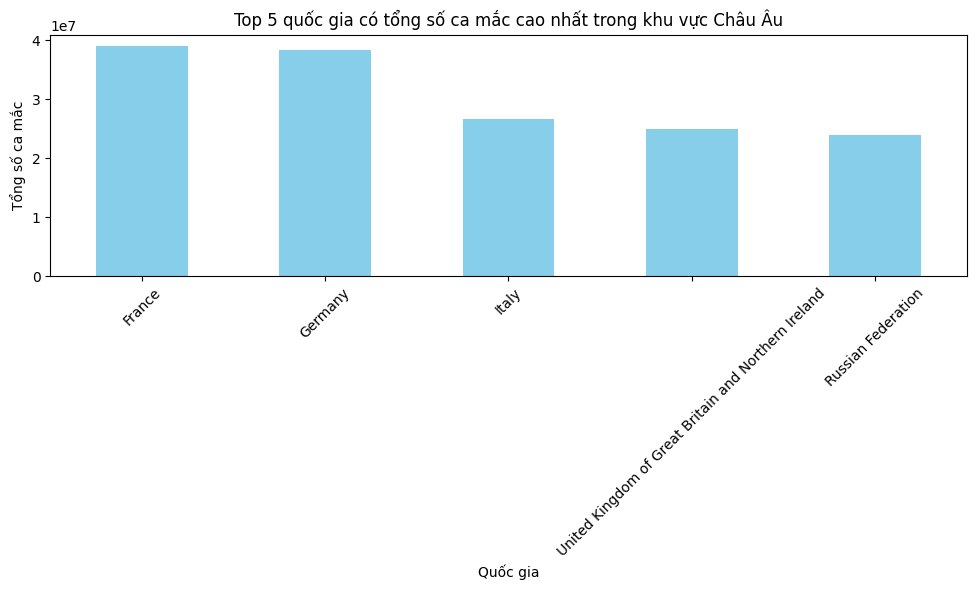

In [76]:
plt.figure(figsize=(10, 6))
top_5_countries.plot(kind='bar', color='skyblue')
plt.title('Top 5 quốc gia có tổng số ca mắc cao nhất trong khu vực Châu Âu')
plt.xlabel('Quốc gia')
plt.ylabel('Tổng số ca mắc')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [77]:
14. # Lọc dữ liệu cho khu vực Châu Phi
africa_data = data[data['WHO_region'] == 'AFRO']

# Tính tổng số ca mắc cho mỗi quốc gia trong khu vực
total_cases_by_country = africa_data.groupby('Country')['Cumulative_cases'].max()

# Lấy ra 5 quốc gia có tổng số ca mắc cao nhất
top_5_countries = total_cases_by_country.sort_values(ascending=False).head(5)
top_5_countries

Country
South Africa    4072636.0
Ethiopia         501117.0
Zambia           349304.0
Kenya            344094.0
Botswana         330417.0
Name: Cumulative_cases, dtype: float64

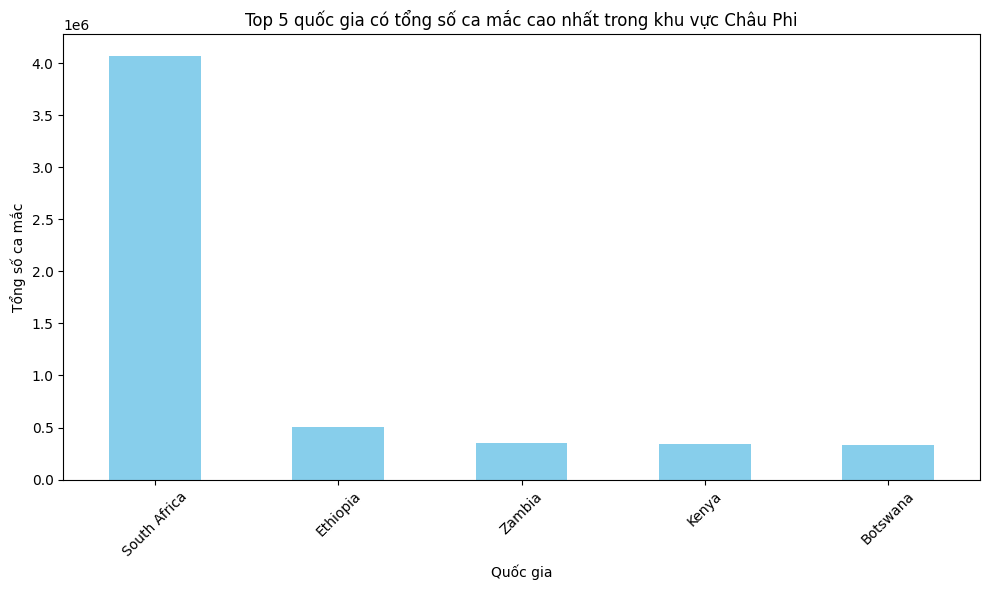

In [78]:
plt.figure(figsize=(10, 6))
top_5_countries.plot(kind='bar', color='skyblue')
plt.title('Top 5 quốc gia có tổng số ca mắc cao nhất trong khu vực Châu Phi')
plt.xlabel('Quốc gia')
plt.ylabel('Tổng số ca mắc')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [79]:
#14. # Lọc dữ liệu cho khu vực Thái Bình Dương Tây
western_pacific_data = data[data['WHO_region'] == 'WPRO']

# Tính tổng số ca mắc cho mỗi quốc gia trong khu vực
total_cases_by_country = western_pacific_data.groupby('Country')['Cumulative_cases'].max()

# Lấy ra 5 quốc gia có tổng số ca mắc cao nhất
top_5_countries = total_cases_by_country.sort_values(ascending=False).head(5)
top_5_countries

Country
China                99331724.0
Republic of Korea    34571873.0
Japan                33803572.0
Australia            11777278.0
Viet Nam             11624000.0
Name: Cumulative_cases, dtype: float64

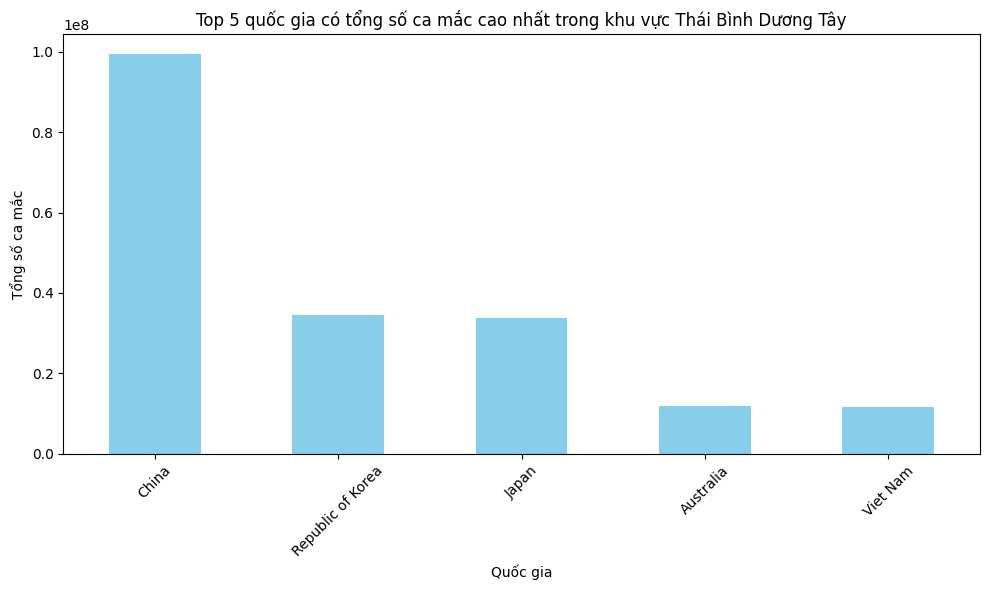

In [80]:
plt.figure(figsize=(10, 6))
top_5_countries.plot(kind='bar', color='skyblue')
plt.title('Top 5 quốc gia có tổng số ca mắc cao nhất trong khu vực Thái Bình Dương Tây')
plt.xlabel('Quốc gia')
plt.ylabel('Tổng số ca mắc')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [81]:
#14. Lọc dữ liệu cho khu vực Châu Mỹ
americas_data = data[data['WHO_region'] == 'AMRO']

# Tính tổng số ca mắc cho mỗi quốc gia trong khu vực
total_cases_by_country = americas_data.groupby('Country')['Cumulative_cases'].max()

# Lấy ra 5 quốc gia có tổng số ca mắc cao nhất
top_5_countries = total_cases_by_country.sort_values(ascending=False).head(5)
top_5_countries

Country
United States of America    103436829.0
Brazil                       37519960.0
Argentina                    10078785.0
Mexico                        7702809.0
Colombia                      6377200.0
Name: Cumulative_cases, dtype: float64

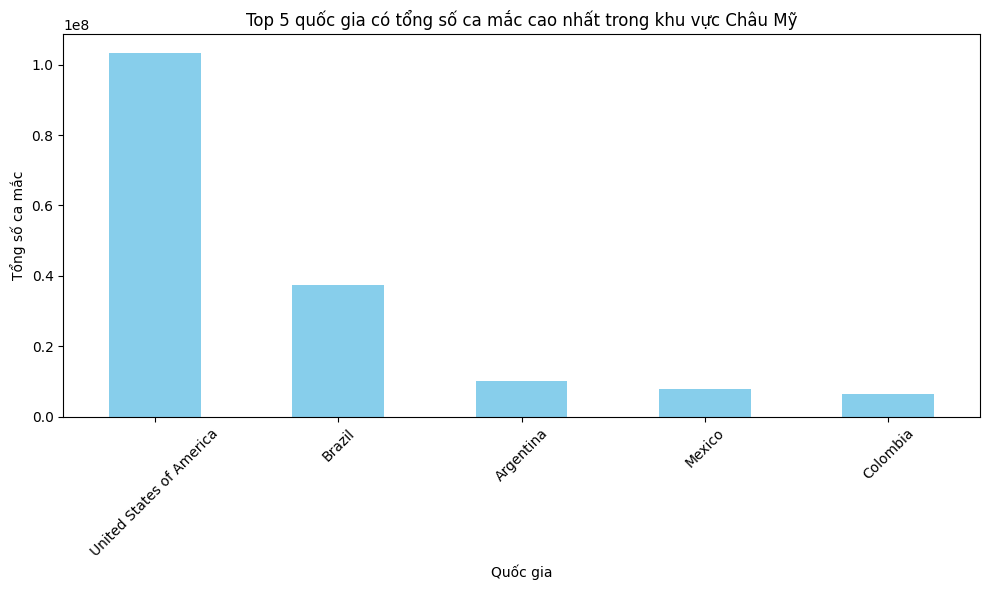

In [82]:
plt.figure(figsize=(10, 6))
top_5_countries.plot(kind='bar', color='skyblue')
plt.title('Top 5 quốc gia có tổng số ca mắc cao nhất trong khu vực Châu Mỹ')
plt.xlabel('Quốc gia')
plt.ylabel('Tổng số ca mắc')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [83]:
#14. Lọc dữ liệu cho khu vực Đông Á và Nam Á
southeast_asia_data = data[data['WHO_region'] == 'SEARO']

# Tính tổng số ca mắc cho mỗi quốc gia trong khu vực
total_cases_by_country = southeast_asia_data.groupby('Country')['Cumulative_cases'].max()

# Lấy ra 5 quốc gia có tổng số ca mắc cao nhất
top_5_countries = total_cases_by_country.sort_values(ascending=False).head(5)
top_5_countries

Country
India         45028053.0
Indonesia      6828268.0
Thailand       4766713.0
Bangladesh     2047887.0
Nepal          1003450.0
Name: Cumulative_cases, dtype: float64

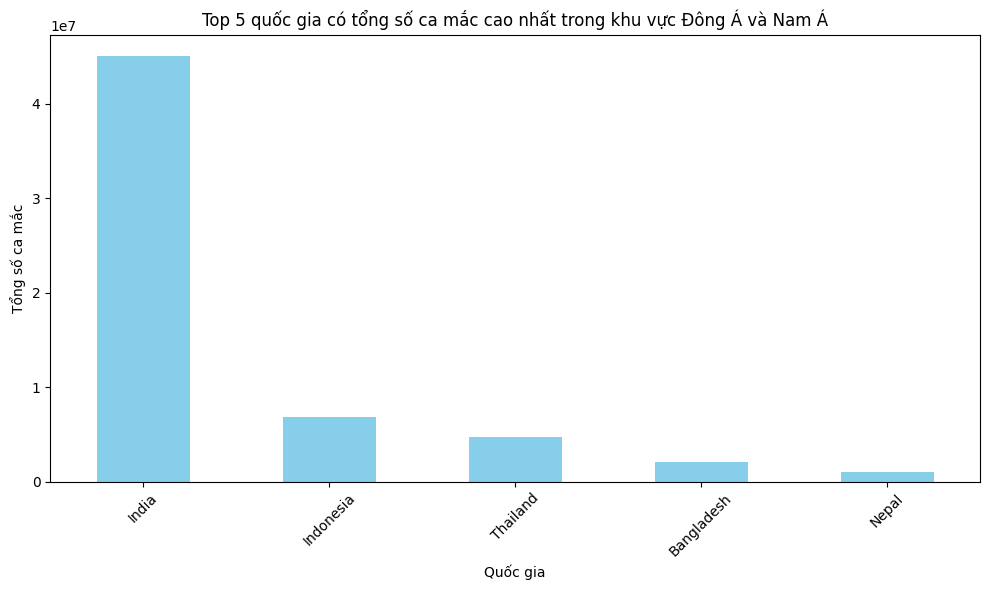

In [84]:
plt.figure(figsize=(10, 6))
top_5_countries.plot(kind='bar', color='skyblue')
plt.title('Top 5 quốc gia có tổng số ca mắc cao nhất trong khu vực Đông Á và Nam Á')
plt.xlabel('Quốc gia')
plt.ylabel('Tổng số ca mắc')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [85]:
#15. Trong mỗi khu vực WHO thì quốc gia nào có tổng ca tử vong cao nhất?
# # Lọc dữ liệu cho khu vực EMRO (địa trung hải)
emro_data = data[data['WHO_region'] == 'EMRO']

# Tính tổng số ca tử vong cho mỗi quốc gia trong khu vực EMRO
total_deaths_by_country = emro_data.groupby('Country')['Cumulative_deaths'].max()

# Lấy ra 5 quốc gia có tổng số ca tử vong cao nhất
top_5_countries = total_deaths_by_country.sort_values(ascending=False).head(5)
top_5_countries

Country
Iran (Islamic Republic of)    146811.0
Pakistan                       30656.0
Tunisia                        29423.0
Iraq                           25375.0
Egypt                          24830.0
Name: Cumulative_deaths, dtype: float64

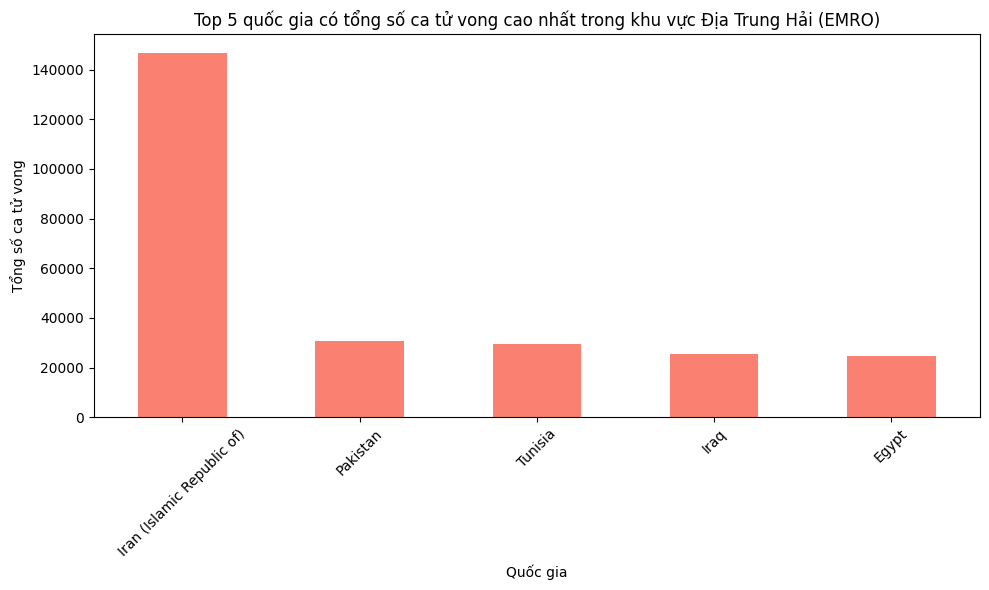

In [86]:
plt.figure(figsize=(10, 6))
top_5_countries.plot(kind='bar', color='salmon')
plt.title('Top 5 quốc gia có tổng số ca tử vong cao nhất trong khu vực Địa Trung Hải (EMRO)')
plt.xlabel('Quốc gia')
plt.ylabel('Tổng số ca tử vong')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [87]:
#15. Lọc dữ liệu cho khu vực Châu Phi
africa_data = data[data['WHO_region'] == 'AFRO']

# Tính tổng số ca tử vong cho mỗi quốc gia trong khu vực Châu Phi
total_deaths_by_country = africa_data.groupby('Country')['Cumulative_deaths'].max()

# Lấy ra 5 quốc gia có tổng số ca tử vong cao nhất
top_5_countries = total_deaths_by_country.sort_values(ascending=False).head(5)
top_5_countries

Country
South Africa    102595.0
Ethiopia          7574.0
Algeria           6881.0
Zimbabwe          5736.0
Kenya             5689.0
Name: Cumulative_deaths, dtype: float64

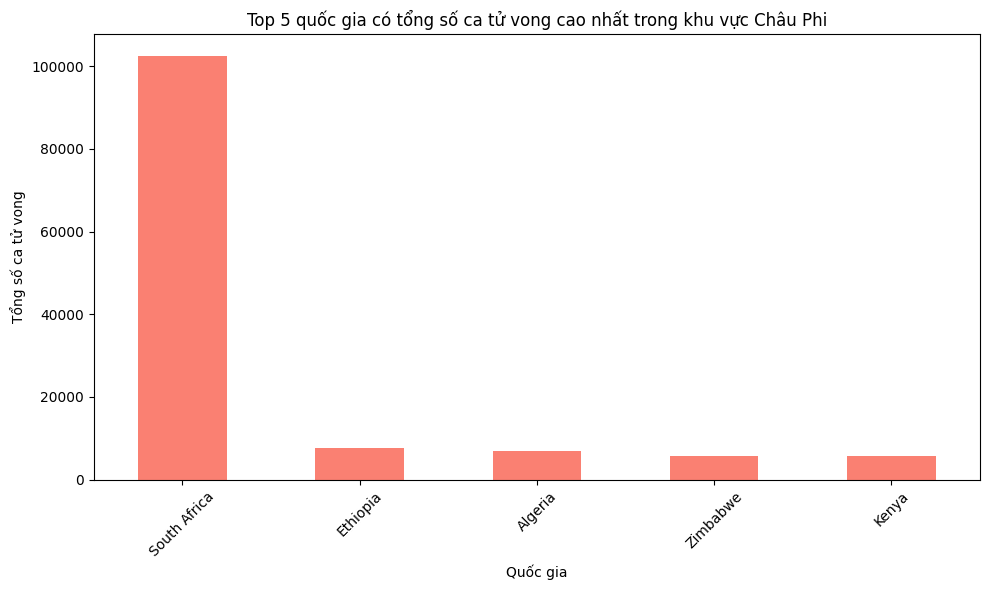

In [88]:
plt.figure(figsize=(10, 6))
top_5_countries.plot(kind='bar', color='salmon')
plt.title('Top 5 quốc gia có tổng số ca tử vong cao nhất trong khu vực Châu Phi')
plt.xlabel('Quốc gia')
plt.ylabel('Tổng số ca tử vong')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [89]:
#15 Lọc dữ liệu cho khu vực Thái Bình Dương Tây
western_pacific_data = data[data['WHO_region'] == 'WPRO']

# Tính tổng số ca tử vong cho mỗi quốc gia trong khu vực Thái Bình Dương Tây
total_deaths_by_country = western_pacific_data.groupby('Country')['Cumulative_deaths'].max()

# Lấy ra 5 quốc gia có tổng số ca tử vong cao nhất
top_5_countries = total_deaths_by_country.sort_values(ascending=False).head(5)
top_5_countries

Country
China          121956.0
Japan           74694.0
Philippines     66864.0
Viet Nam        43206.0
Malaysia        37347.0
Name: Cumulative_deaths, dtype: float64

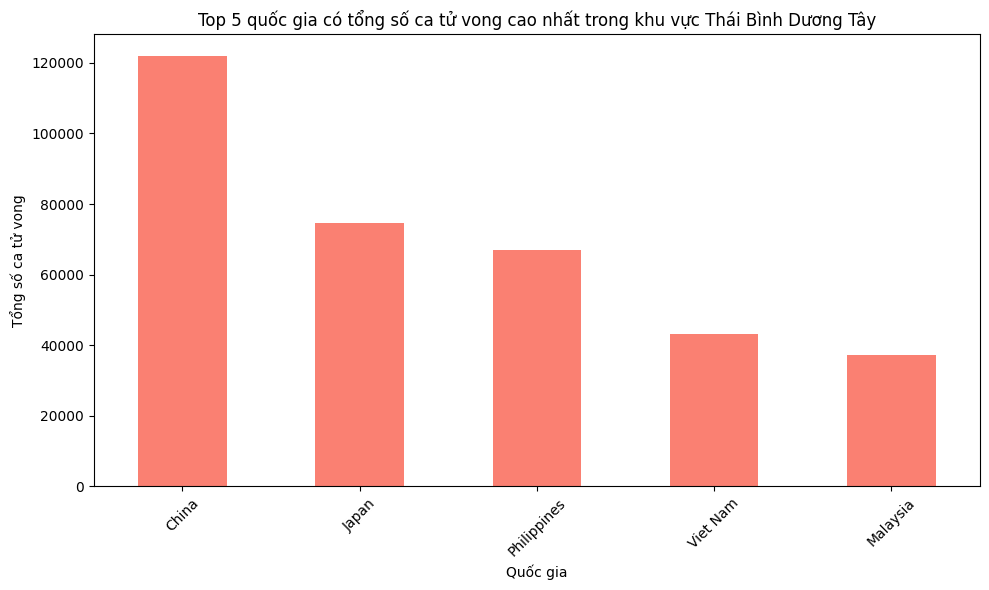

In [90]:
plt.figure(figsize=(10, 6))
top_5_countries.plot(kind='bar', color='salmon')
plt.title('Top 5 quốc gia có tổng số ca tử vong cao nhất trong khu vực Thái Bình Dương Tây')
plt.xlabel('Quốc gia')
plt.ylabel('Tổng số ca tử vong')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [91]:
#15 # Lọc dữ liệu cho khu vực Châu Mỹ
americas_data = data[data['WHO_region'] == 'AMRO']

# Tính tổng số ca tử vong cho mỗi quốc gia trong khu vực Châu Mỹ
total_deaths_by_country = americas_data.groupby('Country')['Cumulative_deaths'].max()

# Lấy ra 5 quốc gia có tổng số ca tử vong cao nhất
top_5_countries = total_deaths_by_country.sort_values(ascending=False).head(5)
top_5_countries

Country
United States of America    1174676.0
Brazil                       702116.0
Mexico                       334958.0
Peru                         221583.0
Colombia                     142727.0
Name: Cumulative_deaths, dtype: float64

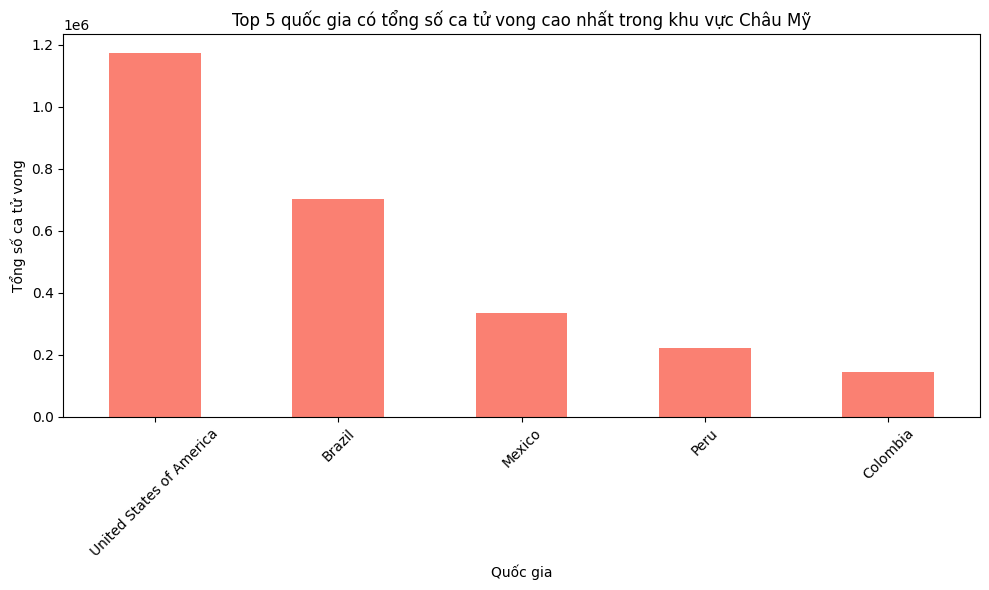

In [92]:
plt.figure(figsize=(10, 6))
top_5_countries.plot(kind='bar', color='salmon')
plt.title('Top 5 quốc gia có tổng số ca tử vong cao nhất trong khu vực Châu Mỹ')
plt.xlabel('Quốc gia')
plt.ylabel('Tổng số ca tử vong')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [93]:
# Lọc dữ liệu cho khu vực Đông Á và Nam Á
southeast_asia_data = data[data['WHO_region'] == 'SEARO']

# Tính tổng số ca tử vong cho mỗi quốc gia trong khu vực Đông Á và Nam Á
total_deaths_by_country = southeast_asia_data.groupby('Country')['Cumulative_deaths'].max()

# Lấy ra 5 quốc gia có tổng số ca tử vong cao nhất
top_5_countries = total_deaths_by_country.sort_values(ascending=False).head(5)
top_5_countries

Country
India         533472.0
Indonesia     162054.0
Thailand       34624.0
Bangladesh     29486.0
Myanmar        19494.0
Name: Cumulative_deaths, dtype: float64

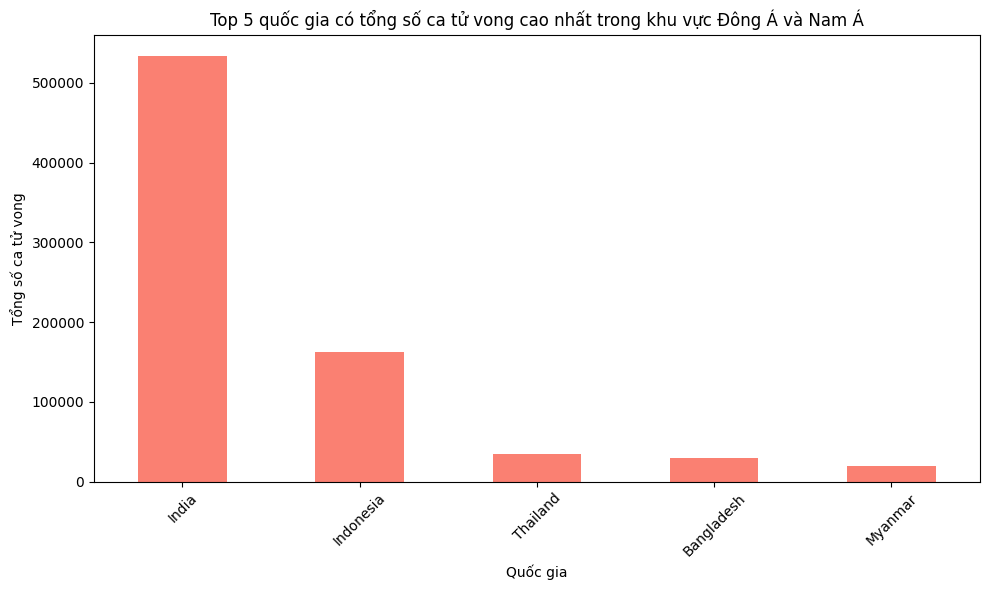

In [94]:
plt.figure(figsize=(10, 6))
top_5_countries.plot(kind='bar', color='salmon')
plt.title('Top 5 quốc gia có tổng số ca tử vong cao nhất trong khu vực Đông Á và Nam Á')
plt.xlabel('Quốc gia')
plt.ylabel('Tổng số ca tử vong')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [95]:
#16. Nước nào có ca tử vong đầu tiên trong mỗi khu vực Tây Thái Bình Dương (WPRO) ?
# Lọc dữ liệu cho khu vực Tây Thái Bình Dương
wpro_data = data[data['WHO_region'] == 'WPRO']

# Lọc dữ liệu có số ca tử vong mới lớn hơn 0
wpro_data_with_new_deaths = wpro_data[wpro_data['New_deaths'] > 0]

# Nhóm dữ liệu theo quốc gia và lấy ngày tử vong đầu tiên
first_deaths_by_country = wpro_data_with_new_deaths.groupby('Country')['Date_reported'].min()

# Sắp xếp ngày từ nhỏ đến lớn và lấy 5 quốc gia đầu tiên
first_deaths_by_country_sorted = first_deaths_by_country.sort_values().head(5)

print(first_deaths_by_country_sorted)


Country
China               2020-01-12
Philippines         2020-02-02
Japan               2020-02-16
Republic of Korea   2020-02-23
Australia           2020-03-08
Name: Date_reported, dtype: datetime64[ns]


In [96]:
#17. Việt Nam có tổng ca mắc đứng thứ mấy trên thế giới?
# Nhóm dữ liệu theo tên quốc gia và lấy giá trị lớn nhất của Cumulative_cases
max_cases_by_country = data.groupby('Country')['Cumulative_cases'].max()

# Sắp xếp dữ liệu từ cao đến thấp
sorted_data = max_cases_by_country.sort_values(ascending=False)

# Xác định xếp hạng của Việt Nam
vietnam_ranking = sorted_data.index.get_loc('Viet Nam') + 1

# Lấy tổng số ca mắc của Việt Nam
total_cases_vietnam = max_cases_by_country.loc['Viet Nam']

print("Việt Nam đứng thứ", vietnam_ranking, "về tổng số ca mắc COVID-19 trên thế giới, với tổng số ca mắc là", total_cases_vietnam)


Việt Nam đứng thứ 15 về tổng số ca mắc COVID-19 trên thế giới, với tổng số ca mắc là 11624000.0


In [97]:
# Lấy 20 quốc gia có tổng số ca mắc lớn nhất
top_20_countries = sorted_data.head(20)

# In ra 20 quốc gia này
print("20 quốc gia có tổng số ca mắc lớn nhất:")
print(top_20_countries)


20 quốc gia có tổng số ca mắc lớn nhất:
Country
United States of America                                103436829.0
China                                                    99331724.0
India                                                    45028053.0
France                                                   38997490.0
Germany                                                  38437756.0
Brazil                                                   37519960.0
Republic of Korea                                        34571873.0
Japan                                                    33803572.0
Italy                                                    26709711.0
United Kingdom of Great Britain and Northern Ireland     24905537.0
Russian Federation                                       23931163.0
Türkiye                                                  17004677.0
Spain                                                    13980340.0
Australia                                                11777278.0


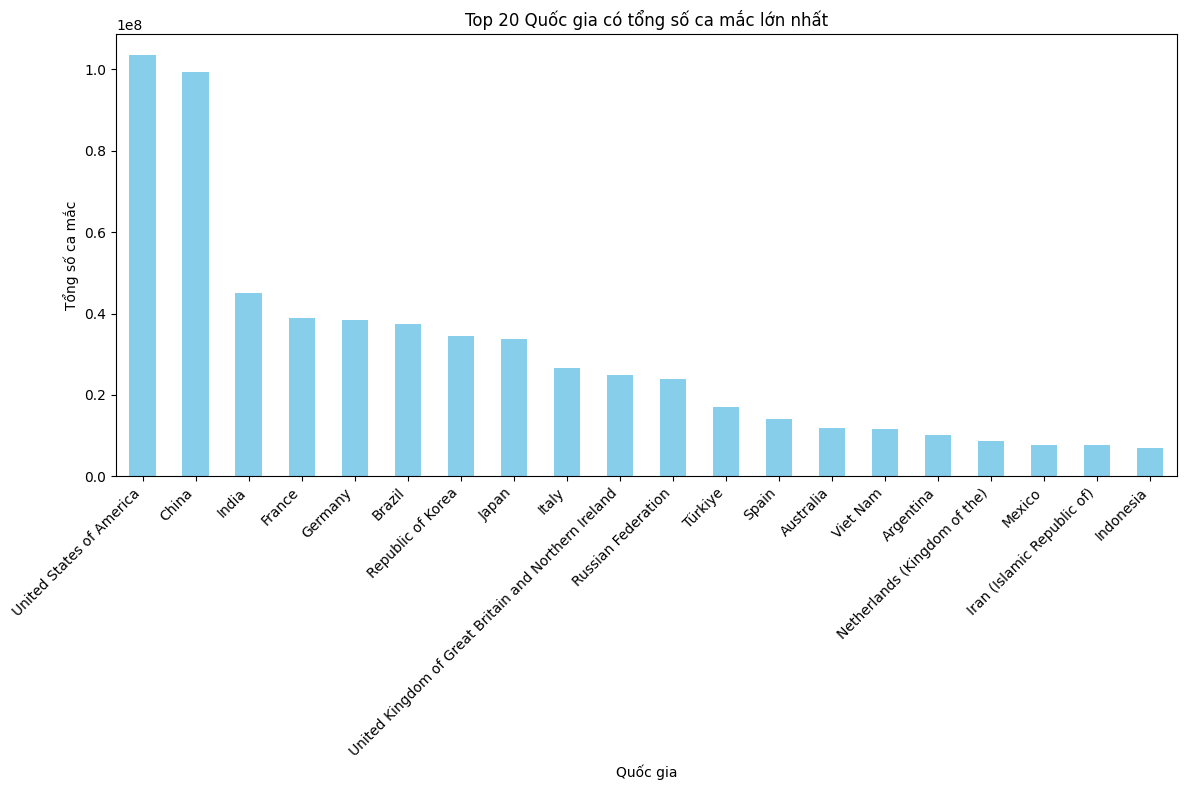

In [98]:
import matplotlib.pyplot as plt

# Tạo biểu đồ cột
plt.figure(figsize=(12, 8))
top_20_countries.plot(kind='bar', color='skyblue')
plt.title('Top 20 Quốc gia có tổng số ca mắc lớn nhất')
plt.xlabel('Quốc gia')
plt.ylabel('Tổng số ca mắc')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [99]:
#18. Việt nam có tổng ca tử vong thứ mấy trên thế giới
# Nhóm dữ liệu theo tên quốc gia và lấy giá trị lớn nhất của Cumulative_deaths
max_deaths_by_country = data.groupby('Country')['Cumulative_deaths'].max()

# Sắp xếp dữ liệu từ cao đến thấp
sorted_deaths = max_deaths_by_country.sort_values(ascending=False)

# Xác định xếp hạng của Việt Nam
vietnam_ranking_deaths = sorted_deaths.index.get_loc('Viet Nam') + 1

# Lấy tổng số ca tử vong của Việt Nam
total_deaths_vietnam = max_deaths_by_country.loc['Viet Nam']

print("Việt Nam đứng thứ", vietnam_ranking_deaths, "về tổng số ca tử vong COVID-19 trên thế giới, với tổng số ca tử vong là", total_deaths_vietnam)


Việt Nam đứng thứ 28 về tổng số ca tử vong COVID-19 trên thế giới, với tổng số ca tử vong là 43206.0


In [100]:
# Lấy 30 quốc gia có tổng số ca tử vong lớn nhất
top_30_countries = sorted_deaths.head(30)

# In ra 20 quốc gia này
print("30 quốc gia có tổng số ca tử vong lớn nhất:")
print(top_30_countries)


30 quốc gia có tổng số ca tử vong lớn nhất:
Country
United States of America                                1174676.0
Brazil                                                   702116.0
India                                                    533472.0
Russian Federation                                       402097.0
Mexico                                                   334958.0
United Kingdom of Great Britain and Northern Ireland     232112.0
Peru                                                     221583.0
Italy                                                    196495.0
Germany                                                  174979.0
France                                                   167985.0
Indonesia                                                162054.0
Iran (Islamic Republic of)                               146811.0
Colombia                                                 142727.0
Argentina                                                130548.0
China                   

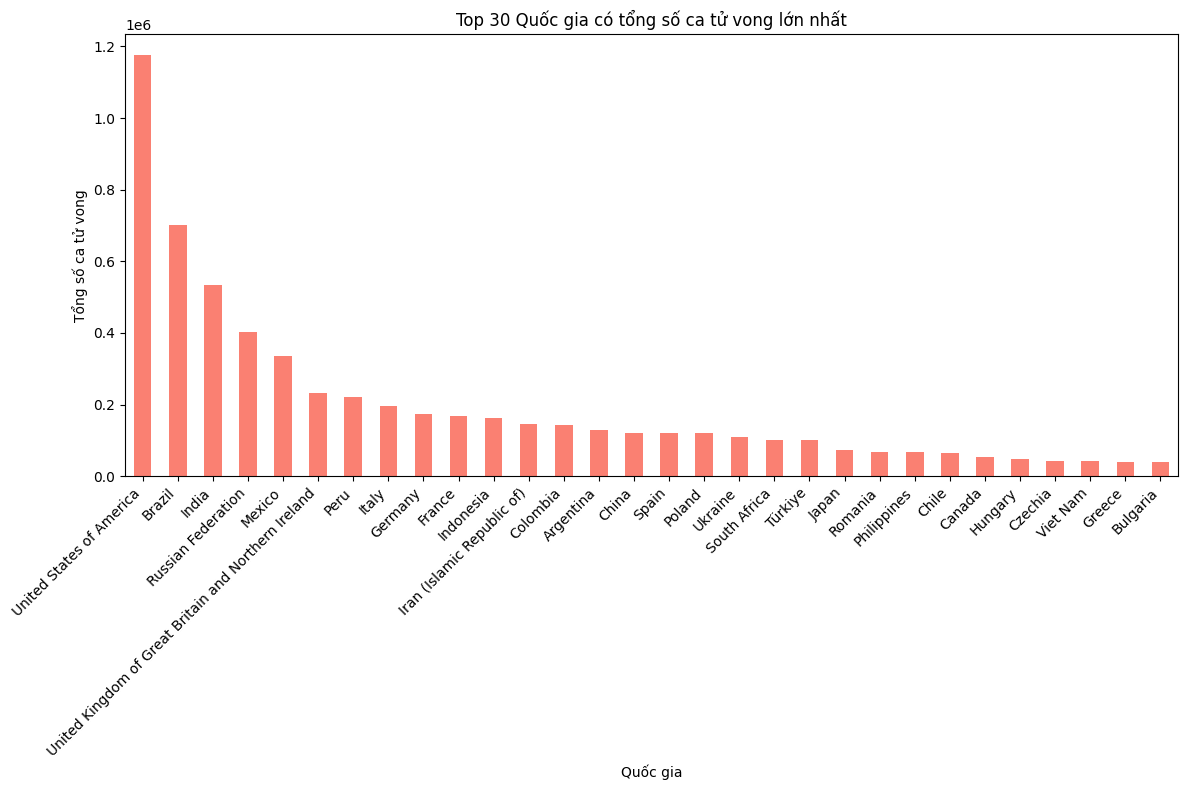

In [101]:
import matplotlib.pyplot as plt

# Tạo biểu đồ cột
plt.figure(figsize=(12, 8))
top_30_countries.plot(kind='bar', color='salmon')
plt.title('Top 30 Quốc gia có tổng số ca tử vong lớn nhất')
plt.xlabel('Quốc gia')
plt.ylabel('Tổng số ca tử vong')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [102]:
#19Việt Nam có ca mắc đầu tiên được ghi nhận khi nào?
# Lọc dữ liệu cho Việt Nam
vietnam_data = data[data['Country'] == 'Viet Nam']

# Lấy dòng đầu tiên mà số ca mắc mới lớn hơn 0
first_case = vietnam_data[vietnam_data['New_cases'] > 0].iloc[0]

# In ra ngày và số ca mắc ngày đầu tiên
print("Việt Nam ghi nhận ca mắc COVID-19 đầu tiên vào ngày:", first_case['Date_reported'])
print("Số ca mắc ngày đó là:", first_case['New_cases'])

Việt Nam ghi nhận ca mắc COVID-19 đầu tiên vào ngày: 2020-01-26 00:00:00
Số ca mắc ngày đó là: 2.0


In [103]:
#20.Việt Nam có ca tử vong đầu tiên được ghi nhận khi nào?
# Lọc dữ liệu cho Việt Nam
vietnam_data = data[data['Country'] == 'Viet Nam']

# Lấy dòng đầu tiên mà số ca tử vong mới lớn hơn 0
first_death = vietnam_data[vietnam_data['New_deaths'] > 0].iloc[0]

# In ra ngày và số ca tử vong ngày đầu tiên
print("Việt Nam ghi nhận ca tử vong COVID-19 đầu tiên vào ngày:", first_death['Date_reported'])
print("Số ca tử vong ngày đó là:", first_death['New_deaths'])

Việt Nam ghi nhận ca tử vong COVID-19 đầu tiên vào ngày: 2020-08-02 00:00:00
Số ca tử vong ngày đó là: 3.0


In [104]:
#21 Số ca mắc và tử vong trên thế giới đến thời điểm hiện tại
# Nhóm dữ liệu theo tên quốc gia và tính tổng số ca mắc và tử vong
total_cases_by_country = data.groupby('Country')['Cumulative_cases'].max()
total_deaths_by_country = data.groupby('Country')['Cumulative_deaths'].max()

# Tính tổng số ca mắc và tử vong trên thế giới
total_cases_world = total_cases_by_country.sum()
total_deaths_world = total_deaths_by_country.sum()

print("Tổng số ca mắc trên thế giới đến thời điểm hiện tại là:", total_cases_world)
print("Tổng số ca tử vong trên thế giới đến thời điểm hiện tại là:", total_deaths_world)

Tổng số ca mắc trên thế giới đến thời điểm hiện tại là: 773229546.0
Tổng số ca tử vong trên thế giới đến thời điểm hiện tại là: 7022804.0


# Nhận xét

Qua bài phân tích dữ liệu về đại dịch Covid-19 ta thấy được mức độ nghiêm trọng của nó trên thế giới .
* Ta có thể thấy được Trung Quốc là nước có ca mắc mới nhiều nhất trên thế giới.
* Mỹ có tổng số ca mắc và tử vong cao nhất trên thế giới.
* Năm 2021 là năm có trung bình ca tử vong cao nhất và năm 2022 là năm có trung bình ca mắc cao nhất tính tới thời điểm hiện tại.
* Trong năm 2020 thì tháng 11 có tổng ca mắc cao nhất và tháng 12 có tổng ca tử vong cao nhất, điều này có thể cho ta thấy được dịch bắt đầu bùng phát từ cuối năm 2020.
* Năm 2021 là năm có số ca tử vong cao nhất, Tháng 1/2021 số ca tử vong gần 500,000 ca và vẫn tiếp tục tăng mạnh cho đến tháng 5 thì bắt đầu giảm, số ca mắc mới vẫn tiếp tục tăng cao , cao nhất là tháng 5.
* Theo ta được biết thì năm 2022 có số ca mắc cao nhất tính tới thời điểm hiện tại, đặc biệt tháng 1/2023 có tổng ca mắc là hơn 90,000,000 ca mắc trong khi năm 2020 và 2021 chỉ gần 24,000,000 ca mỗi năm, tuy nhiên số ca tử vong trong năm nay thấp so với 2020 và 2021, có lẽ năm này đã có những biện pháp phòng tránh nên số ca tử vong bắt đầu giảm.
* Qua năm 2023 thì số ca mắc và tử vong giảm rõ rệt từ tháng 2 đến cuối năm chứng tỏ rằng các biện pháp ngăn ngừa hiệu quả.
* Khu vực Châu Mỹ(AMRO) có tổng ca mắc và tử vong cao nhất trong WHO.
* Germany và China có ca mắc đầu tiên ngày 5/1/202 , nhưng Germany có ca tử vong đầu tiên 5/1/2020 .
* Tổng số ca mắc trên thế giới đến thời điểm hiện tại là 773,229,546 ca và tử vong 7,022,804 ca
* Việt Nam có tổng ca mắc đứng thứ 15 và tử vobg đứng thứ 28 trên thế giới.
* Việt Nam có ca mắc đầu tiên được ghi nhận vào 26/1/2020 và ca tử vong đầu tiên 2/8/2020
* Theo ghi nhận tới thời điểm hiện tại trên thế giới có 773,229,546 ca mắc và 70,22,804 ca tử vong,1 con số quá lớn điều này cho thấy được hậu quả nghiêm trọng của Covid-19 gây ra.
